In [249]:
import numpy as np
import pandas as pd
import random
import timeit
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()                                                                                                                                                            #a new object with copy of objects data nd indices.
wine_w[C]= np.zeros(wine_w.shape[0])                                                                                                                          #returns a new array of given shape and size filled with zeros
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [3]:
wine_w

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         8.8        6    0.0  
1         9.5        6    0.0  
2        10.1        6    0.0  
3         9.9        6    0.0  
4         9.9        6    0.0  
...       ...      ...    ...  
4893     11.2        6    0.0  
4894      9.6        5    0.0  
4895      9.4        6    0.0  
4896     12.8        7    0.0  
4897     11.8        6    0.0  

[4898 rows x 13 columns]

In [4]:
wine_r

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  color  
0         9.4        5    1.0  
1         9.8        5    1.0  
2         9.8        5    1.0  
3         9.8        6    1.0  
4         9.4        5    1.0  
...       ...      ...    ...  
1594     10.5        5    1.0  
1595     11.2        6    1.0  
1596     11.0        6    1.0  
1597     10.2        5    1.0  
1598     11.0        6    1.0  

[1599 rows x 13 columns]

In [5]:
#none normalized

In [6]:
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  color  
0         8.8        6    0.0  
1         9.5        6    0.0  
2        10.1        6    0.0  
3         9.9        6    0.0  
4         9.9        6    0.0  
...       ...      ...    ...  
1594     10.5        5    1.0  
1595     11.2        6    1.0  
1596     11.0        6    1.0  
1597     10.2        5    1.0  
1598     11.0        6    1.0  

[6497 rows x 13 columns]

<h1>PART-1 : PAIR PLOTS </h1>

<h1> Unnormalized pair plot</h1>

Text(0.5, 1, 'Un-Normalized')

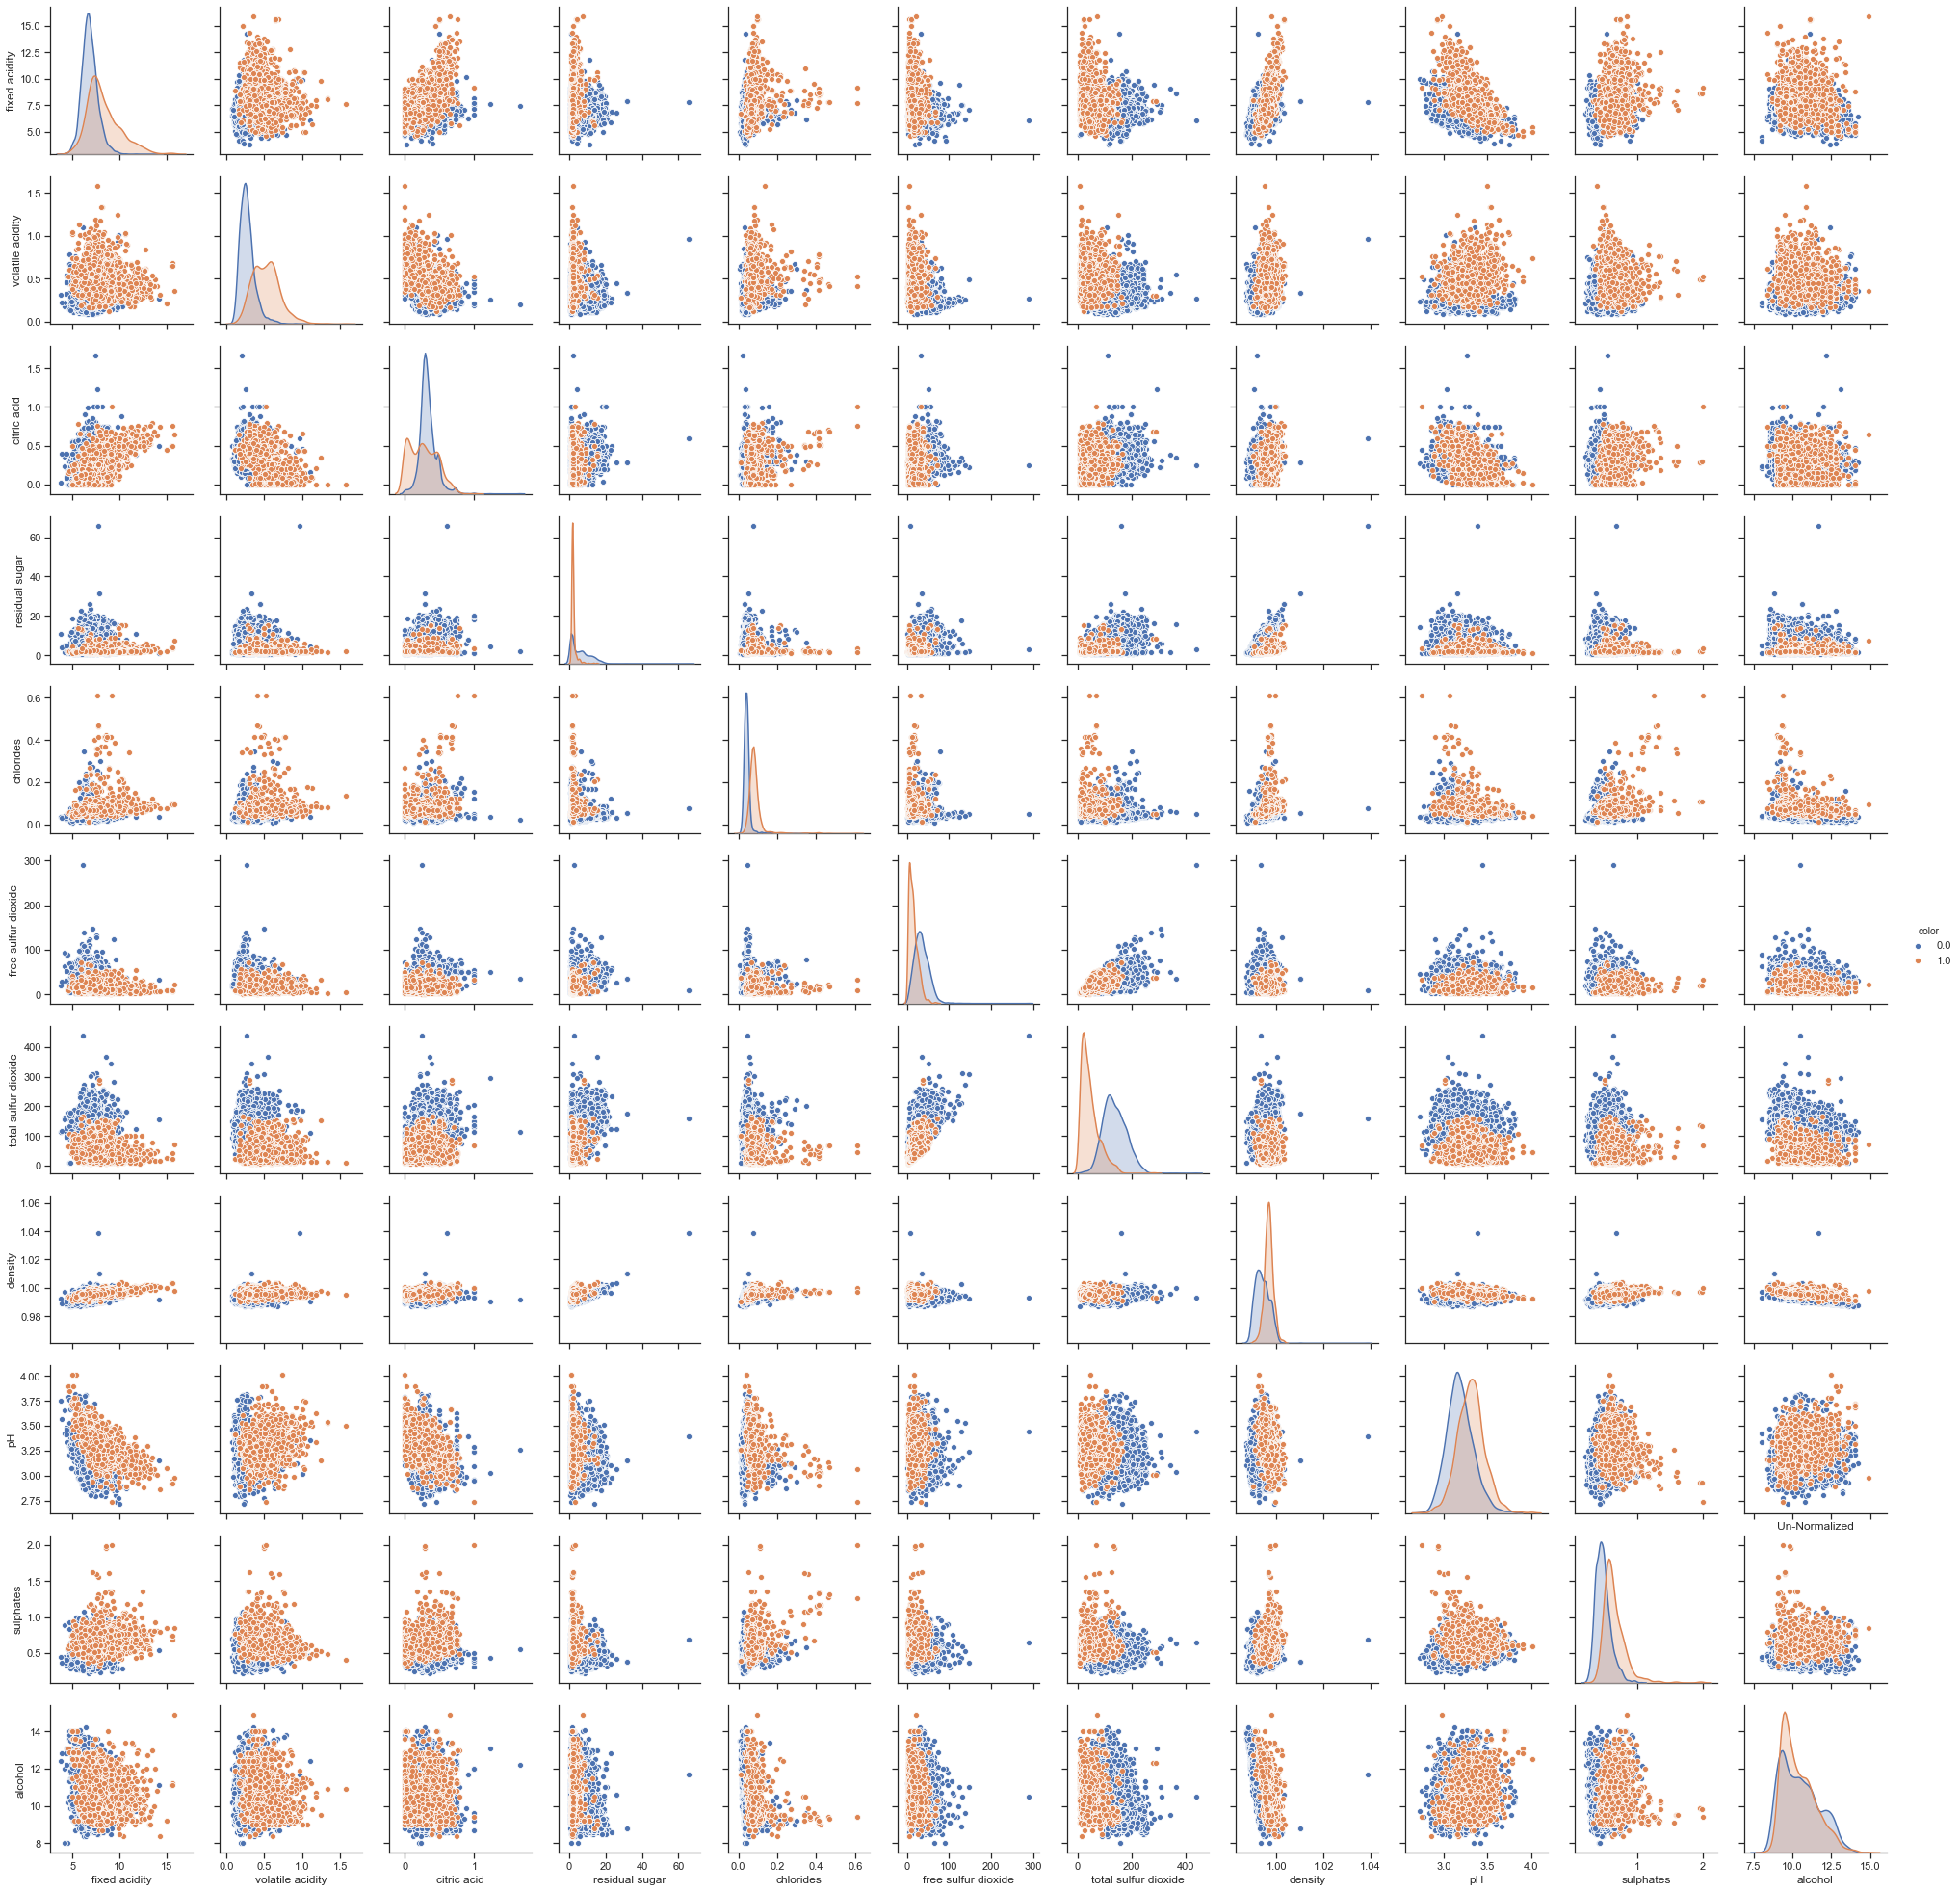

In [7]:
sns.pairplot(wine,vars=wine[D],hue="color")
sns.set_style('whitegrid')
plt.title("Un-Normalized")

In [8]:
# print(wine.shape)
# wine[D].describe()
# wine[D].head()

In [9]:
# print(wine.shape)
# wine[DLC].describe()
# wine[DLC].head()

<h3> zscore normalized fully normalizing the data for pair plot</h3>

In [10]:
#can also be done by :::::
#wine_normalized=StandardScaler().fit_transform(wine[D])
# returns numpy array
#canm also be done by scipy
wine_normalized_for_pairplot=((wine-wine.mean())/wine.std())#normalizing whole dataset. This can also be done using StandardScaler().
wine_normalized_for_pairplot['color']=wine['color'] #replacing color and quality 
wine_normalized_for_pairplot['quality']=wine['quality']

In [11]:
wine_normalized_for_pairplot.std()

fixed acidity           1.000000
volatile acidity        1.000000
citric acid             1.000000
residual sugar          1.000000
chlorides               1.000000
free sulfur dioxide     1.000000
total sulfur dioxide    1.000000
density                 1.000000
pH                      1.000000
sulphates               1.000000
alcohol                 1.000000
quality                 0.873255
color                   0.430779
dtype: float64

In [12]:
wine_normalized_for_pairplot.mean()

fixed acidity           9.426335e-15
volatile acidity       -2.682491e-15
citric acid             2.983593e-14
residual sugar         -3.354977e-15
chlorides              -6.889107e-15
free sulfur dioxide    -1.210787e-15
total sulfur dioxide    4.524966e-17
density                 1.736770e-12
pH                      2.660711e-14
sulphates              -8.569890e-15
alcohol                -4.778225e-14
quality                 5.818378e+00
color                   2.461136e-01
dtype: float64

<h1>Normalized pair plot  </h1>

Text(0.5, 0.98, 'Normalized')

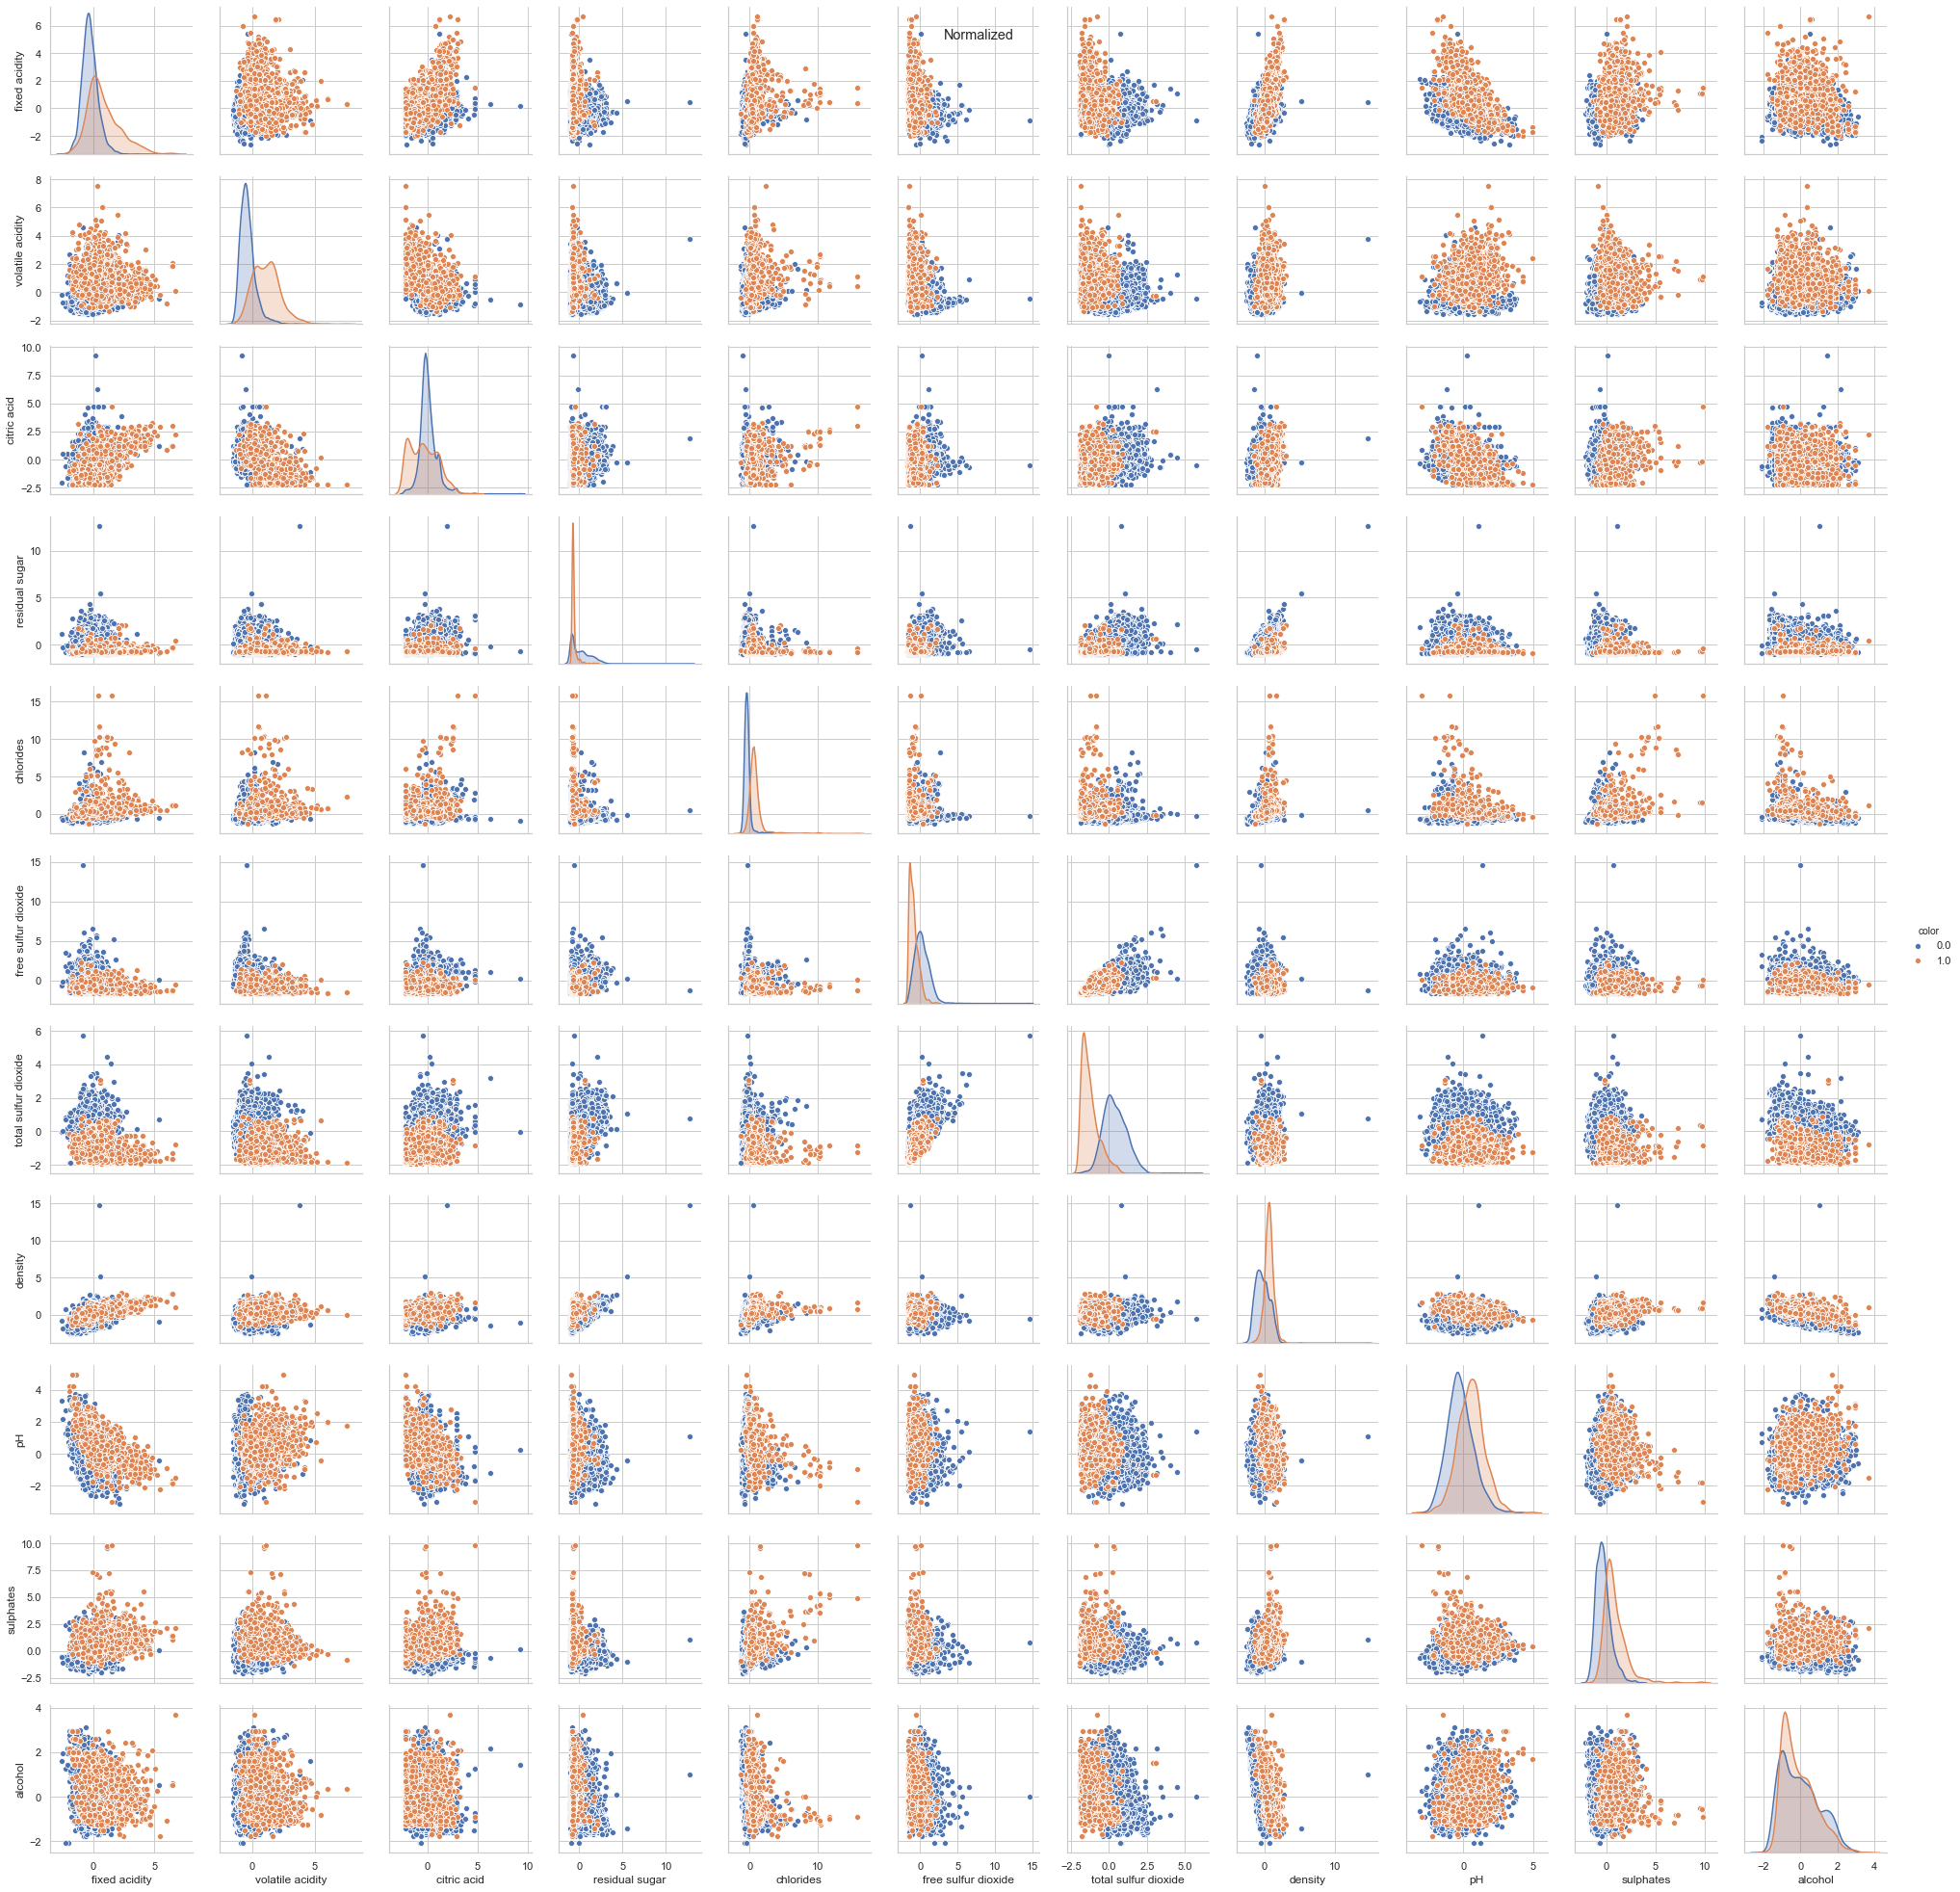

In [13]:
plotting_2=sns.pairplot(wine_normalized_for_pairplot,vars=wine_normalized_for_pairplot[D],hue='color')
sns.set_style('whitegrid')
plotting_2.fig.suptitle("Normalized")

<h1>ANALYSIS::-</h1>
<h3> Normalization Technique:: z-score </h3>
<p>wine_normalized=((wine-wine.mean())/wine.std())</p>
<h3>Need of Normalization::</h3>
<p>Data is normalized so that all the features are on the same scale and one feature doesn't end up dominating others due to the variations in the scale when we try to fit the data into a model. The z-scores have a distribution with a mean of 0 and a standard deviation of 1.</p>

<h3>Pair Plots::</h3>
<h4>1) Unnormalized pair plots :</h4>
<p> It can be clearly seen that the scales for various features are varying hugely viz. </p>
<p> chlorides: max val: 0.6 i.e small variations in the data should have larger effect on the model during classification.</p>
<p> total sulfur dioxide: max val: 400 i.e small variations in the data should have little effect on the model during classification.</p>


<h4>2) Normalized pair plots :</h4>
<p> Z score normalization has scaled the data points to a common scale ranging between -2 and 15 with 0 mean and s.d as 1. </p>
<p> chlorides: max val: 15 </p>
<p> total sulfur dioxide: max val: 6 </p>
<p>Now, all the features in the dataset will have the equalized dominance with respect to units when classification is done.</p>

<h3>Density feature::</h3>
<p>Density when plotted with other features in unnormalized pairplot can been seen less separable and having overlapped data points for class 0 and class 1 of label "color". Whereas, the density when plotted with other features after normalization over a scale of 0-15 is separating the datapoints very clearly.</p>

<h3>Note:Correlation wise feature-feature analysis is given in feature selection section</h3>

<h6>Citations:</h6>
<p>
1.https://statistics.laerd.com/statistical-guides/standard-score-2.php
</p>
<p>
2.https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca 
</p>



<h1>PART-2 :: KNN --> NORMALIZED AND UNNORMALIZED</h1>

<h4>SPLITTING THE DATASET INTO TRAIN TEST (80 : 20) AND THEN PERFORMING NORMALIZATION SEPARATELY TAKING MEAN AND STD DEV OF TRAINSET FOR TESTSET AS WELL. LABEL -->COLOR  </h4>

In [14]:
X=wine[D]
y=wine[C]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 

<h2>Normalization  </h2>

In [15]:
#numpy array
wine_normalized_X_train=((X_train-X_train.mean())/X_train.std())
#normalizing train set. This can also be done using StandardScaler() or z score or fit_transform and transform for test_data.
wine_normalized_X_test=((X_test-X_train.mean())/X_train.std()) 

<p>In real world, we don't have access to the test data so we apply the normalization on the train data and then use the same mean and standard deviation for the unknown data. Even if we have the test data and try to normalize the whole dataset before splitting, we are passing the information about our test data into the model which may increase the accuracy of the model for that set but when novel data is fed into the model, it will generalize poor on it.</p>

<h6>Citations:</h6>
<p>
1.https://stackoverflow.com/a/49444783</p>
<p>
2.https://www.statisticshowto.datasciencecentral.com/normalized/ </p>
<p>
3.https://stackoverflow.com/questions/42092448/accuracy-difference-on-normalization-in-knn</p>


<!-- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.
gradients may end up taking a long time and can oscillate back and forth and take a long time before it can finally find its way to the global/local minimum. To overcome the model learning problem, we normalize the data. We make sure that the different features take on similar ranges of values so that gradient descents can converge more quickly.


The terms normalization and standardization are sometimes used interchangeably, but they usually refer to different things. Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1. This standardization is called a z-score, and data points can be standardized with the following formula:

Source:https://www.statisticshowto.datasciencecentral.com/normalized/
       https://stackoverflow.com/questions/42092448/accuracy-difference-on-normalization-in-knn -->

<!-- why norm in knn ??


For classification algorithms like KNN, we measure the distances between pairs of samples and these distances are influenced by the measurement units also. For example: Let’s say, we are applying KNN on a data set having 3 features.First feature ranging from 1-10, second from 1-20 and the last one ranging from 1-1000. In this case, most of the clusters will be generated based on the last feature as the difference between 1 to 10 and 1-20 are smaller as compared to 1-1000. To avoid this miss classification, we should normalize the feature variables.
source:https://www.researchgate.net/post/How_to_perform_normalization_of_data_before_KNN_Imputation

https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d -->

<h2>KNN --> 3 WEIGHTS || WITHOUT FEATURE EX || UN-NORMALIZED DATA </h2>


In [16]:
start = timeit.default_timer()

n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore 
    
    neigh1 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh1.fit(X_train, y_train)
    y_pred1 = neigh1.predict(X_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1   
    
    neigh2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh2.fit(X_train, y_train)
    y_pred2 = neigh2.predict(X_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2
    
    
stop = timeit.default_timer()
print('Time unnormalized KNN: ', stop - start)

Timetaken = pd.DataFrame(columns = ['Model', 'time'])
Timetaken = Timetaken.append({'Model':'Unnormalized KNN', 'time':stop-start},ignore_index=True)





Time unnormalized KNN:  11.168142673000006


<h3>CONFUSION MATRIX -MISCLASSIFICATIONS || K (HIGHEST ACCURACY)  </h3>

In [17]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=1,weights=col_names[0],p=2)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)


neigh1 = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance',p=1)
neigh1.fit(X_train, y_train)
y_pred1 = neigh1.predict(X_test)

    
neigh2 = neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance',p=2)
neigh2.fit(X_train, y_train)
y_pred2 = neigh2.predict(X_test)


In [18]:
a=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
b=pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)
c=pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

In [19]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=1")
a

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=1


Predicted  0.0  1.0   All
True                     
0.0        958   28   986
1.0         37  277   314
All        995  305  1300

In [20]:
print("CONFUSION MATRIX || DISTANCE MANHATTAN || K=5")
b

CONFUSION MATRIX || DISTANCE MANHATTAN || K=5


Predicted   0.0  1.0   All
True                      
0.0         970   16   986
1.0          34  280   314
All        1004  296  1300

In [21]:
print("CONFUSION MATRIX || DISTANCE EUCLIDEAN || K=6")
c

CONFUSION MATRIX || DISTANCE EUCLIDEAN || K=6


Predicted   0.0  1.0   All
True                      
0.0         969   17   986
1.0          46  268   314
All        1015  285  1300

In [22]:
Timetaken

Model       time
0  Unnormalized KNN  11.168143

In [23]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count  50.000000           50.000000           50.000000
mean    0.927046            0.953062            0.943369
std     0.005373            0.004460            0.003816
min     0.922308            0.945385            0.939231
25%     0.923846            0.949231            0.940769
50%     0.924615            0.953077            0.941538
75%     0.929038            0.955962            0.946731
max     0.950000            0.961538            0.951538

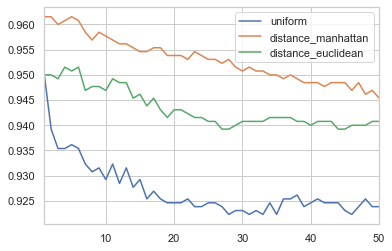

In [25]:
acc[:].plot.line()


<h2>KNN --> 3 WEIGHTS || WITHOUT FEATURE EX || NORMALIZED DATA </h2>


In [26]:
start = timeit.default_timer()

n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh4 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh4.fit(wine_normalized_X_train, y_train)
    y_pred = neigh4.predict(wine_normalized_X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore  
    
    neigh5 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh5.fit(wine_normalized_X_train, y_train)
    y_pred1 = neigh5.predict(wine_normalized_X_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1   
    
    neigh6 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh6.fit(wine_normalized_X_train, y_train)
    y_pred2 = neigh6.predict(wine_normalized_X_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2
    
stop = timeit.default_timer()
print('Normalized KNN: ', stop - start)

Timetaken = Timetaken.append({'Model':'Normalized KNN', 'time':stop-start},ignore_index=True)
    


Normalized KNN:  41.344797043


<h3>CONFUSION MATRIX -MISCLASSIFICATIONS || K (HIGHEST ACCURACY) </h3>

In [27]:
neigh4 = neighbors.KNeighborsClassifier(n_neighbors=3, weights=col_names[0],p=2)
neigh4.fit(wine_normalized_X_train, y_train)
y_pred = neigh4.predict(wine_normalized_X_test)
 
    
neigh5 = neighbors.KNeighborsClassifier(n_neighbors=21, weights='distance',p=1)
neigh5.fit(wine_normalized_X_train, y_train)
y_pred1 = neigh5.predict(wine_normalized_X_test)


neigh6 = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance',p=2)
neigh6.fit(wine_normalized_X_train, y_train)
y_pred2 = neigh6.predict(wine_normalized_X_test)


In [28]:
d=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
e=pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)
f=pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

In [29]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=3")
d

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=3


Predicted  0.0  1.0   All
True                     
0.0        985    1   986
1.0          5  309   314
All        990  310  1300

In [30]:
print("CONFUSION MATRIX || DISTANCE MANHATTAN || K=21")
e

CONFUSION MATRIX || DISTANCE MANHATTAN || K=21


Predicted  0.0  1.0   All
True                     
0.0        985    1   986
1.0          3  311   314
All        988  312  1300

In [31]:
print("CONFUSION MATRIX || DISTANCE EUCLIDEAN || K=3")
e

CONFUSION MATRIX || DISTANCE EUCLIDEAN || K=3


Predicted  0.0  1.0   All
True                     
0.0        985    1   986
1.0          3  311   314
All        988  312  1300

In [32]:
Timetaken

Model       time
0  Unnormalized KNN  11.168143
1    Normalized KNN  41.344797

In [33]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count  50.000000           50.000000           50.000000
mean    0.990815            0.995431            0.992046
std     0.001428            0.000976            0.001342
min     0.988462            0.993846            0.990769
25%     0.990000            0.994615            0.990769
50%     0.990769            0.995385            0.991538
75%     0.990769            0.996154            0.992308
max     0.995385            0.996923            0.996154

In [34]:
# acc

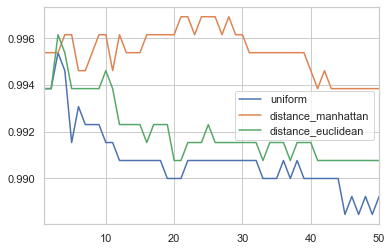

In [35]:
acc[:].plot.line()
#acc.plot(style='.-')

<h1>ANALYSIS::-Normalized and Unnormalized KNN || Weighting schemes-->3 ||Label : color </h1>

<h6>U.E--> Uniform Euclidean, D.M--> Distance Manhattan, D.E--> Distance Euclidean<h6>
<h3>Unnormalized KNN::</h3>
<h4>Performance analysis::</h4>
<p>
1.Time taken: Time taken: 11 s</p>
<p>
2.Misclassification (AT BEST VALUE OF K): For U.E, there are total 65 miclassifications out of which color label 1 is misclassfied 37 times whereas D.M misclassifies color label 1 for 34 times with total 50 misclassifications and D.E leading to 46 misclassifications for color label 1 with a total nearing to 63 which is close to D.M.</p>
<p>
3.Mean Accuracy: The mean accuracies for D.M,D.E,U.E are 95.30%,94.33% and 92.70%.</p>
<p> 
4.Best k values: K=1(overfitting) gives the best accuracy i.e 95% for U.E after which it falls substantially. For D.M k=5 gives highest accuracy of 96.15% with little decrease in accuracy w.r.t increasing k whereas D.E gives 95.15% accuracy at k=6.
</p>


<h3>Normalized KNN::</h3>
<h4>Performance analysis::</h4>
<p>
1.Time taken: Time taken: 35 s</p>
<p>
2.Misclassifictaion(AT BEST VALUE OF K) : For U.E, there are total 6 miclassifications out of which color label 0 is misclassfied 1 times whereas D.M misclassifies color label 0 for 1 time with total 4 misclassifications and D.E leading to 1 misclassifications for color label 0 with a total nearing to 4 which is close to U.E.</p>
<p>
3.Mean Accuracy: The mean accuracies for D.M,D.E,U.E are 99.54%, 99.20% and 99.08%.
</p>
<p> 
4.Best k values: K=3 gives the best accuracy i.e 99.53% for U.E after which it falls substantially. For D.M k=21,22,24,25,26 gives highest accuracy of 96.69% with little decrease in accuracy w.r.t increasing k whereas D.E gives 99.61% accuracy at k=3.
</p>







<h3>Results:</h3>
<p>1.EXECUTION TIME: Combined time taken by all the 3 weighting schemes in KNN for unnormalized data is very less i.e 11 sec which averages to 3.7 seconds per weighting scheme as compared to the time taken by KNN for normalized data which is approximately 3 times taken for unnormalized data i.e 35 seconds.</p>
<p>2.MISCLASSIFICATION ERROR(AT BEST VALUE OF K): From the confusion matrix,for unnormalized data, it can be clearly seen that all the 3 weighting schemes used in KNN are  misclassifying a lot of data points but they are classifying COLOR LABEL=0 very well. Whereas in case of normalized data, the misclassifications by the model fell down drastically and both the color labels i.e 0 and 1 are being classified properly with fewer error classifications.</p>
<p>3.MEAN ACCURACY: It can be clearly seen that there is a substantial change in the mean accuracies of the model when fed with normalized and unnormalized data. It can also be inferred that in both the cases, taking "distance" weights with p=1 i.e manhattan for minkowski metric comes to have the highest mean accuracy so far which is 99.54%(normalized data),95.30%(unnormalized data) and 99.69(norm),96.15(unnorm) as the highest accuracy at k=21,22,24,25,26(norm), k=5(unnorm) which proves that the combination of zscore and distance manhattan is the best scheme explored till now in this case. </p>
<p>4.Best K values: For Normalized data, the best k values for U.E and D.E is found to be 3 whereas for Distance manhattan there are multiple k values (21,22,24,25,26) giving the highest accuracy. For unnormalized data, Distance manhattan gives the highest accuracy at k=5. Thus, Distance mahattan used in KNN for normalized data gives the highest accuracy at multiple k values which are not causing any overfitting and bias.
</p>




<h6>Citations:</h6>
<p>
1.https://statistics.laerd.com/statistical-guides/standard-score-2.php
</p>
<p>
2.https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca 
</p>
<p>
3.https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d
</p>


<h2> Optional bonus 1 : Better than Znorm and Manhattan</h2>

<h6> Minmax norm-Not better </h6>

Minmax normalization linearly transforms x to y= (x-min)/(max-min), where min and max are the minimum and maximum values in x.

<!-- It can be easily seen that when x=min, then y=0, and
When x=max, then y=1.
This means, the minimum value in X is mapped to 0 and the maximum value in X is mapped to 1. So, the entire range of values of X from min to max are mapped to the range 0 to 1. -->

In [159]:
wine_normalized_min_max=((wine-wine.min())/(wine.max() - wine.min()))
wine_normalized_min_max['color']=wine['color'] # - color and quality 
wine_normalized_min_max['quality']=wine['quality']

In [160]:
x_min_max=wine_normalized_min_max[D]
y_min_max=wine_normalized_min_max[C]
X_train_min_max, X_test_min_max, y_train_min_max, y_test_min_max = train_test_split(x_min_max, y_min_max, test_size=0.2, random_state = 42) 

In [161]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    

    neigh148 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='chebyshev')
    neigh148.fit(X_train_min_max, y_train)
    y_pred1 = neigh148.predict(X_test_min_max)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1   

In [162]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count     50.0           50.000000                50.0
mean       0.0            0.984308                 0.0
std        0.0            0.002701                 0.0
min        0.0            0.981538                 0.0
25%        0.0            0.981731                 0.0
50%        0.0            0.983077                 0.0
75%        0.0            0.986923                 0.0
max        0.0            0.990000                 0.0

<h6>metric=max(|x - y|) not better giving 94% </h6>
<h6>Tried other metrics as well. Didn't succeed.</h6>

<h1> optional bonus 2- feature selection </h1> 

In [36]:
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  color  
0         8.8        6    0.0  
1         9.5        6    0.0  
2        10.1        6    0.0  
3         9.9        6    0.0  
4         9.9        6    0.0  
...       ...      ...    ...  
1594     10.5        5    1.0  
1595     11.2        6    1.0  
1596     11.0        6    1.0  
1597     10.2        5    1.0  
1598     11.0        6    1.0  

[6497 rows x 13 columns]

<h2>FEATURE SELECTION::-- Pearson correlation coefficient </h2>

fixed acidity           0.486740
volatile acidity        0.653036
chlorides               0.512678
total sulfur dioxide    0.700357
sulphates               0.487218
color                   1.000000
Name: color, dtype: float64

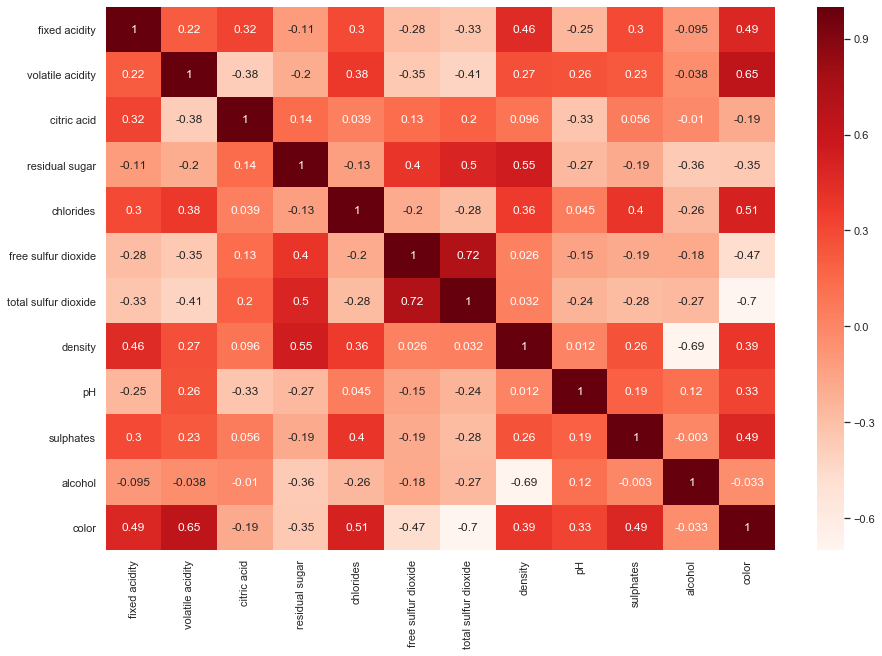

In [37]:
#Using Pearson Correlation on unnormalized data set
plt.figure(figsize=(15,10))
#finding corr between various features including color leavig quality out.
corn = wine[DC].corr()
#plotting on heatmap
sns.heatmap(corn, annot=True, cmap=plt.cm.Reds)
#making all features correlation absolute wrt color 
cor_target = abs(corn['color'])   # taking absolute value because there is a correlation no matter positive or nEGATIVE .
#Selecting highly correlated features 
high_features = cor_target[cor_target>0.48]
high_features

<h3>FINDING CORELATION BETWEEN THESE SELECTED FEATURES(FEATURES WITH HIGHEST CORRELATION WITH LABEL COLOR). IT SHOULD BE LESS THAN 0.5 . LET'S SAY THIS IS OUR THRESHOLD.</h3>

In [38]:
corn

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
color                      0.486740          0.653036    -0.187397   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
color                      -0.348821   0.512678            -0.471644   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
color                            -0.700357  0.390645  0.329129   0.487218   

                       alcohol     color  
fixed acidity        -0.095452  0.486740  
volatile acidity     -0.037640  0.653036  
citric acid          -0.010493 -0.187397  
residual sugar       -0.359415 -0.348821  
chlorides            -0.256916  0.512678  
free sulfur dioxide  -0.179838 -0.471644  
total sulfur dioxide -0.265740 -0.700357  
density              -0.686745  0.390645  
pH                    0.121248  0.329129  
sulphates            -0.003029  0.487218  
alcohol               1.000000 -0.032970  
color                -0.032970  1.000000

In [39]:
wine[["total sulfur dioxide","chlorides","volatile acidity","sulphates","density"]].corr()

total sulfur dioxide  chlorides  volatile acidity  \
total sulfur dioxide              1.000000  -0.279630         -0.414476   
chlorides                        -0.279630   1.000000          0.377124   
volatile acidity                 -0.414476   0.377124          1.000000   
sulphates                        -0.275727   0.395593          0.225984   
density                           0.032395   0.362615          0.271296   

                      sulphates   density  
total sulfur dioxide  -0.275727  0.032395  
chlorides              0.395593  0.362615  
volatile acidity       0.225984  0.271296  
sulphates              1.000000  0.259478  
density                0.259478  1.000000

<h3>Correaltion between these features is less than 0.5 which is acceptable. </h3>

<h3>Result :Pearson correlation coefficient for feature selection leaves us with feature set :-[total sulfur dioxide ,volatile acidity ,chlorides,sulphates] showing good correlation with color. Each showing corr more than 0.48 with label "color".</h3>


<h2> FEATURE IMPORTANCE::--ExtraTreesClassifier</h2>

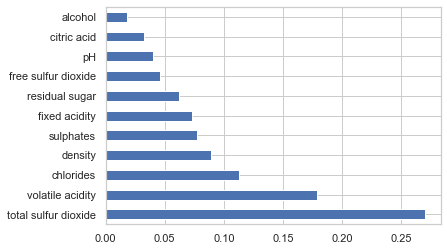

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
classi = ExtraTreesClassifier()
X=wine[D]
y=wine[C]
classi.fit(X,y)
imp_fea = pd.Series(classi.feature_importances_, index=X.columns)
imp_fea.nlargest(15).plot(kind='barh')

In [41]:
imp_fea

fixed acidity           0.072850
volatile acidity        0.179256
citric acid             0.032260
residual sugar          0.062209
chlorides               0.112704
free sulfur dioxide     0.046011
total sulfur dioxide    0.270001
density                 0.089499
pH                      0.039653
sulphates               0.077716
alcohol                 0.017841
dtype: float64

<h3>RESULT :: Extras Trees Classifier for feature importance leaves us with feature set :-[total sulfur dioxide ,volatile acidity ,chlorides,density] having the highest importance with respect to label "color".</h3>

<h2>FEATURE IMPORTANCE::--RANDOM FOREST CLASSIFIER</h2>

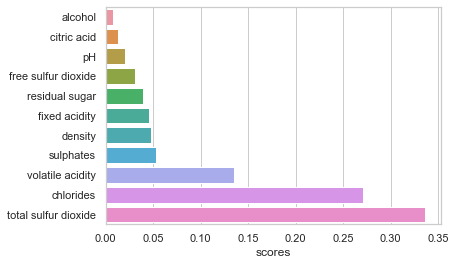

In [42]:
from sklearn.ensemble import RandomForestClassifier
X=wine[D]
y=wine[C]
model_fea_imp = RandomForestClassifier().fit(X, y).feature_importances_
cols=list(wine[D].columns)
fea_scores = pd.DataFrame({'scores':model_fea_imp}, index=cols).sort_values('scores')
sns.barplot(fea_scores['scores'], fea_scores.index)

In [43]:
fea_scores

scores
alcohol               0.008153
citric acid           0.012690
pH                    0.020739
free sulfur dioxide   0.031173
residual sugar        0.039068
fixed acidity         0.045656
density               0.047667
sulphates             0.052983
volatile acidity      0.135011
chlorides             0.271163
total sulfur dioxide  0.335696

<h3>RandomForest Classifier for feature importance leaves us with feature set :-[total sulfur dioxide ,chlorides,volatile acidity,density] having the highest importance with respect to label "color".</h3>


In [150]:
selectedfea=wine[['total sulfur dioxide','chlorides','volatile acidity','density']]

<h3>USING FEATURES SELECTED BY RANDOM FOREST FOR CLASSIFICATION</h3>

In [45]:
selectedfea

total sulfur dioxide  chlorides  volatile acidity  density
0                    170.0      0.045             0.270  1.00100
1                    132.0      0.049             0.300  0.99400
2                     97.0      0.050             0.280  0.99510
3                    186.0      0.058             0.230  0.99560
4                    186.0      0.058             0.230  0.99560
...                    ...        ...               ...      ...
1594                  44.0      0.090             0.600  0.99490
1595                  51.0      0.062             0.550  0.99512
1596                  40.0      0.076             0.510  0.99574
1597                  44.0      0.075             0.645  0.99547
1598                  42.0      0.067             0.310  0.99549

[6497 rows x 4 columns]

<h4>APPLYING KNN ON 4 SELECTED FEATURES ::UNNORMALIZED DATA</h4>

In [46]:
X_train,X_test, y_train, y_test = train_test_split(selectedfea, wine[C], test_size=0.2, random_state = 42)

In [47]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh4 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh4.fit(X_train, y_train)
    y_pred = neigh4.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore  
    
    neigh5 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh5.fit(X_train, y_train)
    y_pred1 = neigh5.predict(X_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1   
    
    neigh6 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh6.fit(X_train, y_train)
    y_pred2 = neigh6.predict(X_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2

In [48]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count  50.000000           50.000000           50.000000
mean    0.927154            0.954462            0.951723
std     0.008933            0.005742            0.006182
min     0.918462            0.948462            0.944615
25%     0.920000            0.950192            0.947115
50%     0.925385            0.953077            0.950000
75%     0.929231            0.955385            0.954615
max     0.965385            0.970769            0.965385

<h2>WE FIND OUT HERE, THAT THE HIGHEST ACCURACY AND MEAN ACCURACY GIVEN BY THE 4 SELECTED FEATURES IS MORE THAN THAT OF ALL THE FEATURES, WHEN KNN CLASSIFICATION IS DONE.</h2>
<h2>selected features=[['total sulfur dioxide','chlorides','volatile acidity','density']]</h2>
<h5>Note: Detailed analysis below. Following correct order of Assignment.</h5>

<h3>EXTRA -Markdown_test1:: Applying PCA on 4 selected features for comparison-- Not a good approach</h3>

In [49]:
selectedfea_norm=(selectedfea-selectedfea.mean())/selectedfea.std() #normalized

In [50]:
X_train,X_test, y_train, y_test = train_test_split(selectedfea_norm, wine[C], test_size=0.2, random_state = 42)

In [51]:
from sklearn.decomposition import PCA
pca_4=PCA(random_state=42)
pca_train_data=pca_4.fit_transform(X_train) #in order to keep the variations different ?
pca_test_data=pca_4.transform(X_test)

In [52]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh7 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh7.fit(pca_train_data, y_train)
    y_pred = neigh7.predict(pca_test_data)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore
    
    neigh8 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh8.fit(pca_train_data, y_train)
    y_pred1 = neigh8.predict(pca_test_data)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh9 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh9.fit(pca_train_data, y_train)
    y_pred2 = neigh9.predict(pca_test_data)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2


In [53]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count  50.000000           50.000000           50.000000
mean    0.984154            0.985354            0.985800
std     0.001978            0.001327            0.001392
min     0.980000            0.983846            0.983846
25%     0.982308            0.984615            0.984615
50%     0.984615            0.984615            0.985385
75%     0.985385            0.986154            0.986923
max     0.987692            0.990000            0.988462

<h3>EXTRA -Markdown_test2:: Applying LDA on 4 selected features -- Not a good approach.</h3>

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_4 = LDA()
lda_transformed_train=lda_4.fit_transform(X_train, y_train) #feature reduced to 1 
lda_transformed_test=lda_4.transform(X_test) # same but separately  # also tested for same .

In [55]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
for k in n_neighborslist:
    neigh10 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh10.fit(lda_transformed_train, y_train)
    y_pred = neigh10.predict(lda_transformed_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore

    neigh11 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh11.fit(lda_transformed_train, y_train)
    y_pred1 = neigh11.predict(lda_transformed_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh12 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh12.fit(lda_transformed_train, y_train)
    y_pred2 = neigh12.predict(lda_transformed_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2


In [56]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count  50.000000           50.000000           50.000000
mean    0.972815            0.976308            0.976308
std     0.001728            0.001744            0.001744
min     0.969231            0.969231            0.969231
25%     0.971731            0.976923            0.976923
50%     0.973846            0.976923            0.976923
75%     0.973846            0.976923            0.976923
max     0.976154            0.977692            0.977692

<h1>PART-3 :: PCA,LDA,PCA(5) -->KNN --> NORMALIZED </h1>

<h2>PCA--> KNN --> 3 WEIGHTS||NORMALIZED DATA ||LABEL:COLOR</h2>


In [57]:
start = timeit.default_timer()

from sklearn.decomposition import PCA
pca_normalized=PCA(random_state=42)
pca_train_data=pca_normalized.fit_transform(wine_normalized_X_train) #in order to keep the variations different ?
pca_test_data=pca_normalized.transform(wine_normalized_X_test)

In [58]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh7 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh7.fit(pca_train_data, y_train)
    y_pred = neigh7.predict(pca_test_data)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore
    
    neigh8 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh8.fit(pca_train_data, y_train)
    y_pred1 = neigh8.predict(pca_test_data)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh9 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh9.fit(pca_train_data, y_train)
    y_pred2 = neigh9.predict(pca_test_data)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2
    
stop = timeit.default_timer()
print('Time PCA KNN NORMALIZED: ', stop - start)

Timetaken = Timetaken.append({'Model':'PCA KNN NORMALIZED', 'time':stop-start},ignore_index=True)


Time PCA KNN NORMALIZED:  30.63401044699998


<h3>CONFUSION MATRIX -MISCLASSIFICATIONS || K (HIGHEST ACCURACY) </h3>

In [59]:
neigh7 = neighbors.KNeighborsClassifier(n_neighbors=3, weights=col_names[0],p=2)
neigh7.fit(pca_train_data, y_train)
y_pred = neigh7.predict(pca_test_data)

neigh8 = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance',p=1)
neigh8.fit(pca_train_data, y_train)
y_pred1 = neigh8.predict(pca_test_data)

neigh9 = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance',p=2)
neigh9.fit(pca_train_data, y_train)
y_pred2 = neigh9.predict(pca_test_data)


In [60]:
g=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
h=pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)
i=pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

In [61]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=3")
g

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=3


Predicted  0.0  1.0   All
True                     
0.0        985    1   986
1.0          5  309   314
All        990  310  1300

In [62]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=5")
h

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=5


Predicted  0.0  1.0   All
True                     
0.0        983    3   986
1.0          4  310   314
All        987  313  1300

In [63]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=3")
i

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=3


Predicted  0.0  1.0   All
True                     
0.0        985    1   986
1.0          4  310   314
All        989  311  1300

In [64]:
Timetaken

Model       time
0    Unnormalized KNN  11.168143
1      Normalized KNN  41.344797
2  PCA KNN NORMALIZED  30.634010

In [65]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count  50.000000           50.000000           50.000000
mean    0.990815            0.992154            0.992046
std     0.001428            0.001153            0.001342
min     0.988462            0.990000            0.990769
25%     0.990000            0.991538            0.990769
50%     0.990769            0.991538            0.991538
75%     0.990769            0.993077            0.992308
max     0.995385            0.994615            0.996154

In [66]:
# acc

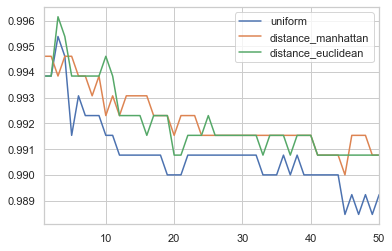

In [67]:
acc[:].plot.line()

<h2>LDA--> KNN --> 3 WEIGHTS||NORMALIZED DATA ||LABEL:COLOR</h2>


In [68]:
start = timeit.default_timer()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_normalized = LDA()
lda_transformed_train=lda_normalized.fit_transform(wine_normalized_X_train, y_train) #feature reduced to 1 
lda_transformed_test=lda_normalized.transform(wine_normalized_X_test) # same but separately  # also tested for same .
# lda_with_label=pd.concat([lda_tranformed1,wine_normalized[C]],axis=1)
#it separated the data class wise.

In [69]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh10 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh10.fit(lda_transformed_train, y_train)
    y_pred = neigh10.predict(lda_transformed_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore

    neigh11 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh11.fit(lda_transformed_train, y_train)
    y_pred1 = neigh11.predict(lda_transformed_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh12 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh12.fit(lda_transformed_train, y_train)
    y_pred2 = neigh12.predict(lda_transformed_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2
    
stop = timeit.default_timer()
print('Time LDA KNN NORMALIZED: ', stop - start)

Timetaken = Timetaken.append({'Model':'LDA KNN NORMALIZED', 'time':stop-start},ignore_index=True)


Time LDA KNN NORMALIZED:  5.1140159699999685


<h3>CONFUSION MATRIX -MISCLASSIFICATIONS || K (HIGHEST ACCURACY)</h3>

In [70]:
neigh10 = neighbors.KNeighborsClassifier(n_neighbors=7, weights=col_names[0],p=2)
neigh10.fit(lda_transformed_train, y_train)
y_pred = neigh10.predict(lda_transformed_test)

neigh11 = neighbors.KNeighborsClassifier(n_neighbors=27, weights='distance',p=1)
neigh11.fit(lda_transformed_train, y_train)
y_pred1 = neigh11.predict(lda_transformed_test)

    
neigh12 = neighbors.KNeighborsClassifier(n_neighbors=27,weights='distance',p=2)
neigh12.fit(lda_transformed_train, y_train)
y_pred2 = neigh12.predict(lda_transformed_test)

In [71]:
j=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
k=pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)
l=pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

In [72]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=7")
j

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=7


Predicted  0.0  1.0   All
True                     
0.0        983    3   986
1.0          4  310   314
All        987  313  1300

In [73]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=27")
k

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=27


Predicted  0.0  1.0   All
True                     
0.0        984    2   986
1.0          7  307   314
All        991  309  1300

In [74]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=27")
l

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=27


Predicted  0.0  1.0   All
True                     
0.0        984    2   986
1.0          7  307   314
All        991  309  1300

In [75]:
# acc

In [76]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count  50.000000           50.000000           50.000000
mean    0.993954            0.992631            0.992631
std     0.000561            0.000384            0.000384
min     0.992308            0.992308            0.992308
25%     0.993846            0.992308            0.992308
50%     0.993846            0.992308            0.992308
75%     0.994615            0.993077            0.993077
max     0.994615            0.993077            0.993077

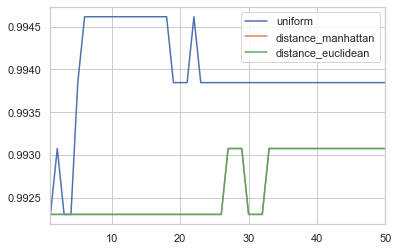

In [77]:
acc[:].plot.line()

<h2>PCA(5)--> KNN --> 3 WEIGHTS||NORMALIZED DATA ||LABEL:COLOR</h2>


In [78]:
start = timeit.default_timer()

from sklearn.decomposition import PCA
pca_5_comp=PCA(5,random_state=42)
pca_train_data1=pca_5_comp.fit_transform(wine_normalized_X_train) #in order to keep the variations different ?
pca_test_data1=pca_5_comp.transform(wine_normalized_X_test)

In [79]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh_test19 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh_test19.fit(pca_train_data1, y_train)
    y_pred = neigh_test19.predict(pca_test_data1)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore
    
    neigh_test20 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh_test20.fit(pca_train_data1, y_train)
    y_pred1 = neigh_test20.predict(pca_test_data1)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh_test21 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh_test21.fit(pca_train_data1, y_train)
    y_pred2 = neigh_test21.predict(pca_test_data1)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2
    
stop = timeit.default_timer()
print('Time PCA(5) KNN NORMALIZED: ', stop - start)

Timetaken = Timetaken.append({'Model':'PCA(5) KNN NORMALIZED', 'time':stop-start},ignore_index=True)

Time PCA(5) KNN NORMALIZED:  12.24678168500003


<h3>CONFUSION MATRIX -MISCLASSIFICATIONS || K (HIGHEST ACCURACY)</h3>

In [80]:
neigh_test19 = neighbors.KNeighborsClassifier(n_neighbors=1, weights=col_names[0],p=2)
neigh_test19.fit(pca_train_data1, y_train)
y_pred = neigh_test19.predict(pca_test_data1)

neigh_test20 = neighbors.KNeighborsClassifier(n_neighbors=12, weights='distance',p=1)
neigh_test20.fit(pca_train_data1, y_train)
y_pred1 = neigh_test20.predict(pca_test_data1)
    
neigh_test21 = neighbors.KNeighborsClassifier(n_neighbors=2, weights='distance',p=2)
neigh_test21.fit(pca_train_data1, y_train)
y_pred2 = neigh_test21.predict(pca_test_data1)

In [81]:
m=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
n=pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)
o=pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

In [82]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=1")
m

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=1


Predicted  0.0  1.0   All
True                     
0.0        979    7   986
1.0          4  310   314
All        983  317  1300

In [83]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=12")
n

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=12


Predicted  0.0  1.0   All
True                     
0.0        981    5   986
1.0          6  308   314
All        987  313  1300

In [84]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=2")
o

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=2


Predicted  0.0  1.0   All
True                     
0.0        980    6   986
1.0          4  310   314
All        984  316  1300

In [85]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count  50.000000           50.000000           50.000000
mean    0.986769            0.988662            0.988800
std     0.001630            0.000890            0.001122
min     0.983077            0.987692            0.986923
25%     0.986154            0.988462            0.987692
50%     0.986923            0.988462            0.988846
75%     0.988269            0.989038            0.989231
max     0.991538            0.991538            0.992308

In [86]:
# acc

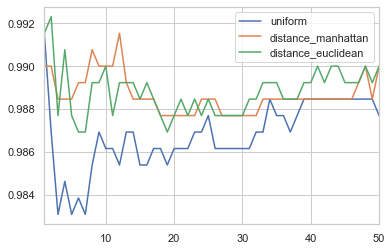

In [87]:
acc[:].plot.line()

<h1>ANALYSIS::-Normalized PCA,LDA,PCA(5)--> KNN || Weighting schemes-->3 ||Label : color </h1>

<h6>U.E--> Uniform Euclidean, D.M--> Distance Manhattan, D.E--> Distance Euclidean<h6>
<h3>PCA(all components)-COMPARISON BETWEEN WEIGHTING SCHEMES::</h3>
<h4>Performance analysis::</h4>
<p>
1.Time taken: 29 s</p>
<p>
2.Misclassifictaion : For U.E, there are total 6 miclassifications out of which color label 0 is misclassfied 1 time whereas D.M misclassifies color label 0 for 3 times with total 7 misclassifications and D.E leading to 1 misclassification for color label 0 with a total nearing to 5. So, least misclassifications are given by D.E and D.M </p>
<p>
3.Mean Accuracy: The mean accuracies for D.M,D.E,U.E are 99.21%, 99.20% and 99.08%. so, highest mean accuracy is given by D.M.</p>
<p> 
4.Best k values: At K=3, both U.E and D.E gives their best accuracies i.e 99.53% and 99.61% after which the accuracies fall drastically. For D.M k=2,4,5 gives highest accuracy of 99.46% with little decrease in accuracy as k increases.
</p>
<h6>RESULT: As a result, in case of PCA(all components), If we consider highest accuracy for a particular k as our parameter, D.E is giving us an accuracy of 99.61% at k=3 with total 5 misclassifications. </h6>
    <h6>D.M is considered as the best scheme(if we consider the mean accuracy along all k's as our parameter) giving least misclassifications with highest mean accuracy(all k's) and not too distorted accuracy changes with varying k. </h6>
    <h6>But here, we choose D.E as the best scheme because of the highest accuracy at k=3.</h6>
    

<h3>LDA-COMPARISON BETWEEN WEIGHTING SCHEMES::</h3>
<h4>Performance analysis::</h4>
<p>
1.Time taken: 4.84 s</p>
<p>
2.Misclassifictaion : For U.E, there are total 8 miclassifications out of which both the color labels are misclassfied 4 times whereas D.M misclassifies color label 0 for 2 times with total 9 misclassifications and D.E leading to 2 misclassifications for color label 0 with a total nearing to 9. So, least misclassifications are given by U.E. </p>
<p>
3.Mean Accuracy: The mean accuracies for D.M,D.E,U.E are 99.26%, 99.26% and 99.39%.</p>
<p> 
4.Best k values: At K=[6-18], U.E gives the highest accuracy i.e 99.46%.For D.M and D.E, the highest accuracy is at k=[27,28,29,33-50] which is 99.30%.
</p>
<h6>RESULT: U.E gives the highest accuracy at optimal values of k i.e k=6,7,8 etc which doesn't cause any overfitting(not predicting test data well bec. of low k) or underfitting(not predicting training as well as test data well) hence maintaing the bias and variance. U.E is also giving us the highest mean accuracy(over all k's). In all the three schemes, when performed on LDA components, it can be seen that with increasing k, accuracy isn't dropping fast.</h6>
    <h6>So, here U.E is outperforming the other schemes slightly. D.E and D.M are also generalizing well.</h6>

<h3>PCA(5 components)-COMPARISON BETWEEN WEIGHTING SCHEMES::</h3>
<h4>Performance analysis::</h4>
<p>
1.Time taken: 11.68 s</p>
<p>
2.Misclassifictaion : For D.M and U.E, there are total 11 miclassifications whereas D.E misclassifies color label 0 for 6 times with total 10 misclassifications.So, least misclassifications are given by D.E. Same is the case when we take all the components in PCA for classification. </p>
<p>
3.Mean Accuracy: The mean accuracies for D.M,D.E,U.E are 98.86%, 98.88% and 98.67%.</p>
<p> 
4.Best k values: When we use U.E on our first 5 P.C's as our scheme, we get the maximum accuracy at k=1 which is clearly a case of overfitting and when we increase the value of k, accuracy drops significantly. D.M gives the highest accuracy of 99.15% at k=12 whereas, highest accuracy using D.E as our scheme is 99.23% which is best out of all the 3 schemes and value of k is 2.
</p>
<h6>RESULT: As a result, in case of PCA(5 components), D.E is considered as the best scheme in terms of accuracy(it gives us the highest accuracy). When taking mean accuracy into consideration, still D.E is outperforming D.M by just 0.02% and U.E by a huge gap. </h6>
<h6>So we choose D.E as the best scheme for PCA(5 components). </h6>
   
    
    
<h1>***As we have explored the best weighing schemes for each individual model for classification. Now we can use those schemes for comparing different models which is explained below.*** </h1>
    
 
    
    
    
<h2>COMPARISON BETWEEN PCA,LDA,PCA(5 COMPONENTS):</h2>
<h5>1.EXECUTION TIME:</h5>
<p>When we classify our test data using PCA(all components) for feature extraction and then KNN using 3 different weighting schemes, it takes approximately 29 seconds for feature extraction and classification(all 3 schemes). Whereas, PCA(5 components) takes 11.68 seconds with a decrease in the highest accuracy of approximately 0.50% in all the three schemes when compared to PCA(all components).LDA-KNN for all the 3 schemes when compared to PCA takes the least time which is around 4.84 sec. </p>
<p>Result---> LDA is best when compared on execution time.</p>
<!--     <h1></h1> -->
<h5>2.MISCLASSIFICATION ERROR: Taking best scheme for each model derived in previous discussion.</h5>
<p>For k giving highest accuracy, the misclassifications made by the best weighting scheme(D.E in case of PCA) for PCA(all components) are 5 which can be seen in the confusion matrix.</p>
<p>For k giving highest accuracy, the misclassifications made by the best weighting scheme(U.E in case of LDA) for LDA(all components) are 8 which can be seen in the confusion matrix.</p>
<p>For k giving highest accuracy, the misclassifications made by the best weighting scheme(D.E in case of PCA(5)) for PCA(5) are 10 which can be seen in the confusion matrix.</p>
    
<p>Result- PCA is best when compared on misclassifying data points in our case. LDA also provides somehow similar results.</p>
    
<h5>3.MEAN ACCURACY(Not a decent parameter for comparison): Taking best scheme for each model derived in previous discussion.</h5>
<p>For all k's , the mean accuracy given by the best weighting scheme(D.E in case of PCA) for PCA(all components) is 99.20%.</p>
<p>For all k's , the mean accuracy given by the best weighting scheme(U.E in case of LDA) for LDA(all components) is 99.39%.</p>
<p>For all k's , the mean accuracy given by the best weighting scheme(D.E in case of PCA(5)) for PCA(5) is 98.88%.</p>

<p>Result---> LDA is best when compared on mean accuracies for best scheme at multiple k's. Although mean accuracy doesn't add up to a decent comparison parameter.</p>

    
<h5>4.HIGHEST ACCURACY: Again Taking best scheme for each model derived in previous discussion.</h5>
<p>For k=3 , the highest accuracy given by the best weighting scheme(D.E in case of PCA) for PCA(all components) is 99.61%.</p>
<p>For k=[6:18] , the highest accuracy given by the best weighting scheme(U.E in case of LDA) for LDA(all components) is 99.46%.</p>
<p>For k=2 , the highest accuracy given by the best weighting scheme(D.E in case of PCA(5)) for PCA(5) is 99.23%.</p>

<p>Result---> PCA is best when compared on highest accuracy for best scheme with other models. LDA also provides somehow similar results and accuracy remains high at multiple k values.</p>

<h3>OVERALL :</h3>
<h5>1.LDA is best when we take execution time into account and the mean accuracies at all k values. Also it provides the highest accuracy at multiple values of k</h5>
<h5>1.PCA(all components) is best when we take highest accuracy into account which is the most important parameter in classification. But it takes longer time to derive the d*d principal components.</h5>
<h5>1.PCA(5 components) provides less accurate results as we loose the information while trading the number of components. Execution time lies somewhere between LDA and PCA(all components), potentially less than half of time taken by PCA(all).</h5>
    
<h6>Citations:</h6>
<p>
1.http://www.vfirst.com/blog/techfirst/dimension-reduction-techniques-pca-vs-lda-in-machine-learning-part-2/
</p>
<p>
2.https://www.researchgate.net/publication/274467188_Performance_Analysis_of_PCA-based_and_LDA-based_Algorithms_for_Face_Recognition
</p>
<p>
3.https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d
</p>
<p>
4.https://medium.com/machine-learning-researcher/dimensionality-reduction-pca-and-lda-6be91734f567
</p>
<p>
5.https://medium.com/analytics-vidhya/types-of-distances-in-machine-learning-5b1233380775
</p>


<h1>FEATURE DISCUSSION</h1>

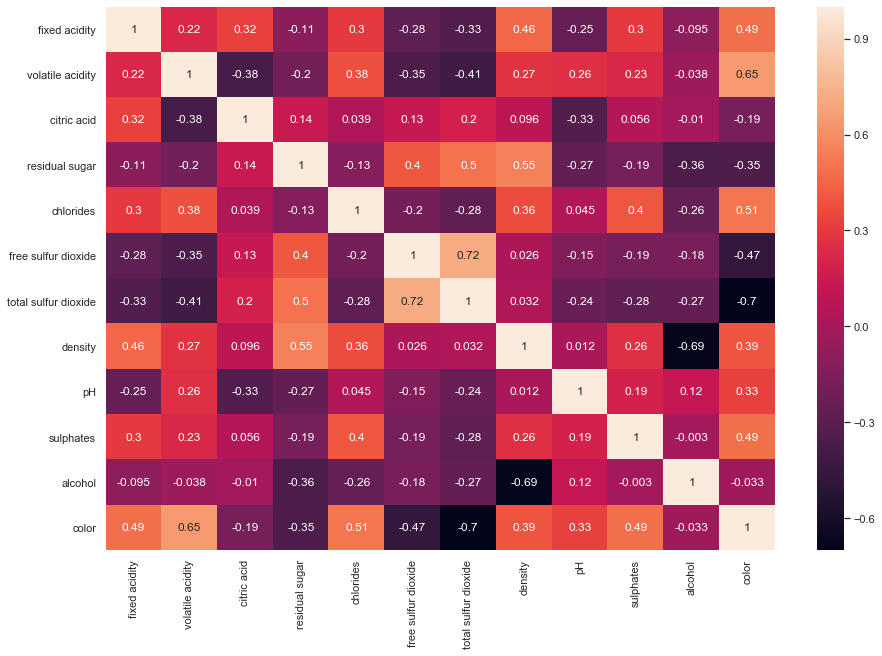

In [88]:
plt.figure(figsize=(15,10))
corn = wine[DC].corr()
sns.heatmap(corn, annot=True)
cor_target = abs(corn['color']) 
high_features = cor_target[cor_target>0.48]

In [89]:
print("HIGHLY CORREALTED FEATURES WITH COLOR LABEL::\n\n")
print(high_features)

HIGHLY CORREALTED FEATURES WITH COLOR LABEL::


fixed acidity           0.486740
volatile acidity        0.653036
chlorides               0.512678
total sulfur dioxide    0.700357
sulphates               0.487218
color                   1.000000
Name: color, dtype: float64


In [90]:
wine[["total sulfur dioxide","chlorides","volatile acidity","sulphates","density"]].corr()

total sulfur dioxide  chlorides  volatile acidity  \
total sulfur dioxide              1.000000  -0.279630         -0.414476   
chlorides                        -0.279630   1.000000          0.377124   
volatile acidity                 -0.414476   0.377124          1.000000   
sulphates                        -0.275727   0.395593          0.225984   
density                           0.032395   0.362615          0.271296   

                      sulphates   density  
total sulfur dioxide  -0.275727  0.032395  
chlorides              0.395593  0.362615  
volatile acidity       0.225984  0.271296  
sulphates              1.000000  0.259478  
density                0.259478  1.000000

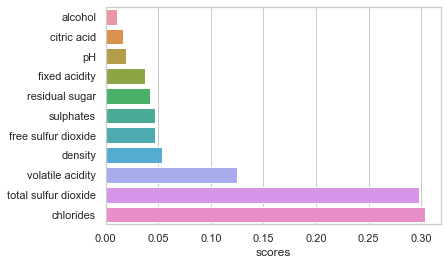

In [91]:
from sklearn.ensemble import RandomForestClassifier
X=wine[D]
y=wine[C]
model_fea_imp = RandomForestClassifier().fit(X, y).feature_importances_
cols=list(wine[D].columns)
fea_scores = pd.DataFrame({'scores':model_fea_imp}, index=cols).sort_values('scores')
sns.barplot(fea_scores['scores'], fea_scores.index)

In [92]:
corn=abs(corn)

In [93]:
corn.min()

fixed acidity           0.095452
volatile acidity        0.037640
citric acid             0.010493
residual sugar          0.111981
chlorides               0.038998
free sulfur dioxide     0.025717
total sulfur dioxide    0.032395
density                 0.011686
pH                      0.011686
sulphates               0.003029
alcohol                 0.003029
color                   0.032970
dtype: float64

<h3>Choosing 2 best features from RandomForestClassifier and PCC (by selecting both feature to feature and feature to class corelations into account), commenting the other feature sets. I have tested on all the feature subsets from PCC, RandomForest and Extratree classifier. You can uncomment and cross check the results.</h3>

In [95]:
selectedfea2=wine[['total sulfur dioxide','chlorides']]

#uncomment to check. I am explaining the results in markdown below.

# selectedfea1=wine[['total sulfur dioxide', 'sulphates']]
# selectedfea1=wine[['alcohol', 'sulphates']]
# selectedfea1=wine[['total sulfur dioxide', 'volatile acidity']]
# selectedfea1=wine[['total sulfur dioxide', 'chlorides']]

X_train,X_test, y_train, y_test = train_test_split(selectedfea2, wine[C], test_size=0.2, random_state = 42)

n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh45 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh45.fit(X_train, y_train)
    y_pred = neigh45.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore  
    
    neigh55 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh55.fit(X_train, y_train)
    y_pred1 = neigh55.predict(X_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1   
    
    neigh66 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh66.fit(X_train, y_train)
    y_pred2 = neigh66.predict(X_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2

In [96]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count  50.000000           50.000000           50.000000
mean    0.931815            0.963031            0.963077
std     0.011636            0.004186            0.004164
min     0.919231            0.957692            0.958462
25%     0.923462            0.959423            0.960000
50%     0.929231            0.961538            0.961538
75%     0.934615            0.965385            0.965385
max     0.971538            0.975385            0.975385

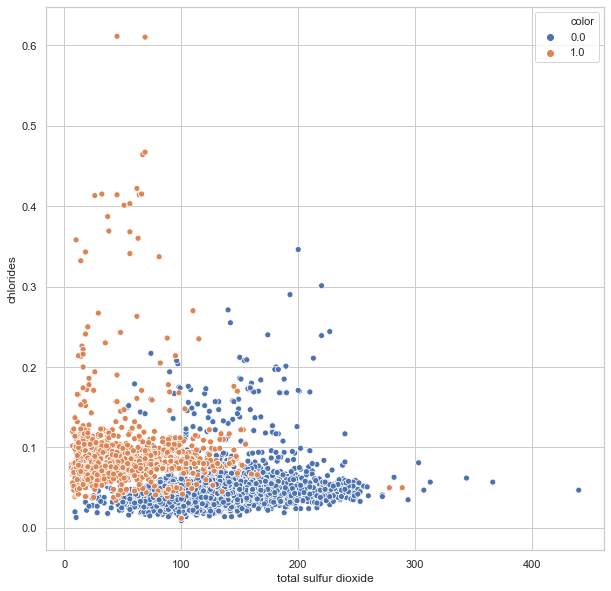

In [97]:
plt.figure(figsize=(10,10))

sns.scatterplot(wine['total sulfur dioxide'],wine['chlorides'],hue=wine['color'])

<h1>Feature Discussion/ Analysis </h1>
<h3>In short:</h3>
<h3> Least correlation can be found between [Alcohol and sulphates].</h3>
<h3> Highest correlation can be found between [Free sulfur dioxide and Total sulfur dioxide]</h3>
<h3>Relationship between the features can be explored by multiple ways. It is hard to analyze the pair plots directly when the number of dimensions and the data points are large. SO, I have compared the features using correlation between the features and the correaltion between features and the class label.</h3>
<h1>Detailed accuracy comparison:</h1>

<h2>Relationship between features T.S.D and Volatile acidity : Highest corelation with class label</h2>
<p>1.Both the features are highly corelated to label "color"</p>
<p>2.I have ignored feature to feature corelation.</p>
<p>3.Approximate Accuracy :94-95%</p>

<h2>Relationship between features T.S.D and sulphates : High corelation with class label for T.S.D and sulphate is less corelated to T.S.D.</h2>
<p>1.T.S.D is highly corelated to label "color" whereas sulphate is 4th most correlated with color.</p>
<p>2.Both are less corelated to each other.</p>
<p>3.Approximate Accuracy :93%</p>

<h2>Relationship between features Alcohol and sulphates:least corelated features</h2>
<p>1.No corealtion with color taken into account.</p>
<p>2.Both are least corelated to each other.</p>
<p>3.Approximate Accuracy :88%</p>

<h2>Relationship between features T.S.D and chlorides : Top 2 corelated features by RandomForest as well..</h2>
<p>1.T.S.D is highly corelated with color. chlorides is 3rd most corelated to color.</p>
<p>2.Both are less corelated to each other.</p>
<p>3.Approximate Accuracy :97.15-97.55%</p>

<h2>Thus, we can get the highest accuracy and separability for the classes when both the feature-feature and feature to class corelations are taken into account. Feature-feature corelation should be minimum as it leads to overfitting and the feature to class corelation should be maximum. The corelation can also be found by symmetrical uncertainty.</h2>
<h2>We can calculate symmetric uncertainty for correlation between features and class label and then add the features with S.U higher than 0.5 to a list of best features and then perform the S.U between the selected feature pairs. </h2>
<h4>Lets say : S(best)=[p,q] are the two best features with highest Symmetric uncertainty with the class. Then we can find the S.U between S.U(p,q) features.</h4>
<h4>If S.U(p,q)>S.U(q,class) then drop feature q</h4>
<h6>Citations:</h6>
<p>
1.https://www.cs.waikato.ac.nz/~mhall/thesis.pdf
</p>
<p>
2.https://link.springer.com/article/10.1007/s11277-019-06504-w
</p>
<p>
3.https://stats.stackexchange.com/questions/54455/how-to-interpret-correlations-with-negative-numbers-in-spss
</p>
<p>
4.https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
</p>
<p>
5.https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features
</p>
<p>
6.https://code-maven.com/predicting-wine-cultivar
</p>


<h1>SELECTED FEATURES SUBSET DISCUSSION || COMPARISON WITH PCA AND LDA.</h1>

In [152]:
selectedfea.head()

total sulfur dioxide  chlorides  volatile acidity  density
0                 170.0      0.045              0.27   1.0010
1                 132.0      0.049              0.30   0.9940
2                  97.0      0.050              0.28   0.9951
3                 186.0      0.058              0.23   0.9956
4                 186.0      0.058              0.23   0.9956

<h6>The code is performed above as I am following the order. I am explaining the results here. You can cross check scrolling up.</h6>

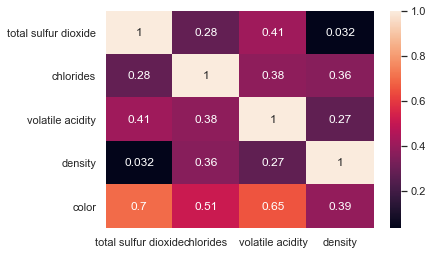

In [157]:
corn_best_fea=corn.loc[['total sulfur dioxide','chlorides','volatile acidity','density','color'], ['total sulfur dioxide','chlorides','volatile acidity','density']]
sns.heatmap(corn_best_fea, annot=True)

<h2>RESULTS USING VARIOUS TECHNIQUES::</h2>

<h3>SUBSET RESULT :: </h3>
     <p>Extras Trees Classifier feature set :-[total sulfur dioxide ,volatile acidity ,chlorides,density]highest importance with label "color".</p>
     <p></p>
<h3>SUBSET RESULT:</h3>
    <p>RandomForest Classifier feature set :-[total sulfur dioxide ,chlorides,volatile acidity,density]| highest importance with label "color".</p>
    <p></p>
<h3>SUBSET RESULT : </h3>
    <p>Pearson correlation coefficient feature set :-[total sulfur dioxide ,volatile acidity ,chlorides,sulphates] showing highest correlation with color.</p>

<h3>Choose 4 features:</h3>
<p>Here, we choose the best 4 features provided by the Random Forest classifier taking feature scores(RF),correlation between features-features and class label(PCC) into consideration.</p>

<p>selected features=[['total sulfur dioxide','chlorides','volatile acidity','density']]</p>

<h3>ACCURACY COMPARISON ::</h3>
<p></p>
<p></p>
<h4>Methods followed--></h4>
<p></p>
<p></p>
<p>Accuracy_4_features=> wine dataset->choosing 4 features->Apply KNN</p>
<p></p>
<p>Accuracy_all_features=> wine dataset->choosing all features->Apply KNN</p>
<p></p>
<p>Accuracy_pca_on_4=> wine dataset->choosing 4 features->Apply pca->Apply KNN</p>
<p></p>
<p>Accuracy_lda_on_4=> wine dataset->choosing 4 features->Apply lda->Apply KNN</p>
<p></p>
<p></p>
<p></p>



<h4>ACCURACY RESULTS--></h4>
<p></p>
<p></p>

<p>Accuracy_4_features : U.E-96.53%, D.M-97.07%, D.E-96.53% </p>
<p></p>

<p>Accuracy_all_features : U.E-95%, D.M-96.15%, D.E-95.15% </p>
<p></p>

<p>Accuracy_pca_on_4 : U.E-98.76%, D.M-99%, D.E-98.8% --Normalized</p>
<p></p>

<p>Accuracy_lda_on_4 : U.E-97.6%, D.M-97.76%, D.E-97.76% --Normalized</p>
<p></p>

<p>Accuracy_pca_all_features : U.E-99.53%,D.M-99.46%,D.E-99.61% --Normalized</p>
<p></p>

<p>Accuracy_lda_all_features : U.E-99.46%,D.M-99.30%,D.E-99.30% --Normalized</p>
<p></p>
<p></p>
<p></p>



<h4>1."Accuracy_4_features" VS "Accuracy_all_features"=> THE HIGHEST ACCURACY AND MEAN ACCURACY GIVEN BY THE 4 SELECTED FEATURES IS MORE THAN THAT GIVEN BY ALL THE FEATURES FOR ALL THE THREE SCHEMES.</h4>

<h4>2."Accuracy_pca_on_4" VS "Accuracy_pca_all_features"=> ACCURACY GIVEN BY PCA ON ALL FEATURES IS APP. 0.6% HIGHER THAN THAT OF PCA WITH 4 FEATURES FOR ALL THE SCHEMES.</h4>

<h4>2."Accuracy_lda_on_4" VS "Accuracy_lda_all_features"=> ACCURACY GIVEN BY LDA ON ALL FEATURES IS APP. 2% HIGHER THAN THAT OF LDA WITH 4 FEATURES FOR ALL THE SCHEMES.</h4>

<h2>Finally we can coclude that the selected 4 features perform better when compared with KNN-on-4 than KNN-on-all. Whereas, there is a slight lag of approximately 0.60% in accuracy when PCA-on-4 is performed rather than PCA-on-all but the execution time is far better. LDA-on-4 lags behind around 2% in accuracy and doesn't add up an advantage to time as well. </h2>

<h2> PCA KNN UNNORMALIZED DATA COLOR AS LABEL</h2>

In [98]:
start = timeit.default_timer()
from sklearn.decomposition import PCA
pca_unnormalized=PCA(random_state=42)
pca_train_data_unnormalized=pca_unnormalized.fit_transform(X_train) #in oredr to keep the variations different ?
pca_test_data_unnormalized=pca_unnormalized.transform(X_test)

In [99]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh13 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh13.fit(pca_train_data_unnormalized, y_train)
    y_pred = neigh13.predict(pca_test_data_unnormalized)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore
    
    neigh14 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh14.fit(pca_train_data_unnormalized, y_train)
    y_pred1 = neigh14.predict(pca_test_data_unnormalized)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh15 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh15.fit(pca_train_data_unnormalized, y_train)
    y_pred2 = neigh15.predict(pca_test_data_unnormalized)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2
stop = timeit.default_timer()
print('Time PCA KNN UNNORMALIZED : ', stop - start)

Timetaken=Timetaken.append({'Model':'PCA KNN UNNORMALIZED ', 'time':stop-start},ignore_index=True)

p=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
q=pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)
r=pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)
print(p,"\n\n")
print(q,"\n\n")
print(r)

Time PCA KNN UNNORMALIZED :  5.730788001000008
Predicted   0.0  1.0   All
True                      
0.0         959   27   986
1.0          74  240   314
All        1033  267  1300 


Predicted   0.0  1.0   All
True                      
0.0         973   13   986
1.0          42  272   314
All        1015  285  1300 


Predicted   0.0  1.0   All
True                      
0.0         973   13   986
1.0          41  273   314
All        1014  286  1300


In [101]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count  50.000000           50.000000           50.000000
mean    0.931846            0.963077            0.963077
std     0.011691            0.004304            0.004161
min     0.919231            0.957692            0.958462
25%     0.923462            0.959423            0.960000
50%     0.929231            0.961538            0.961538
75%     0.934615            0.965385            0.965385
max     0.972308            0.976154            0.975385

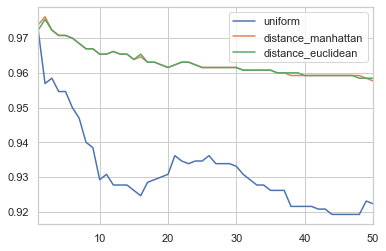

In [102]:
acc[:].plot.line()

<h2> LDA KNN UNNORMALIZED DATA COLOR AS LABEL</h2>

In [103]:

start = timeit.default_timer()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_unnormalized = LDA()
lda_transformed_train_unnormalized=lda_unnormalized.fit_transform(X_train, y_train) #feature reduced to 1 
lda_transformed_test_unnormalized=lda_unnormalized.transform(X_test) # same but separately  # also tested for same .
# lda_with_label=pd.concat([lda_tranformed1,wine_normalized[C]],axis=1)
#it separated the data class wise.

In [104]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh16 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh16.fit(lda_transformed_train_unnormalized, y_train)
    y_pred = neigh16.predict(lda_transformed_test_unnormalized)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore

    neigh17 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh17.fit(lda_transformed_train_unnormalized, y_train)
    y_pred1 = neigh17.predict(lda_transformed_test_unnormalized)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh18 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh18.fit(lda_transformed_train_unnormalized, y_train)
    y_pred2 = neigh18.predict(lda_transformed_test_unnormalized)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2

stop = timeit.default_timer()
print('Time LDA KNN UNNORMALIZED: ', stop - start)

Timetaken=Timetaken.append({'Model':'LDA KNN UNNORMALIZED', 'time':stop-start},ignore_index=True)

    
s=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
t=pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)
u=pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)
print(s,"\n\n")
print(t,"\n\n")
print(u)

Time LDA KNN UNNORMALIZED:  4.880361569999991
Predicted  0.0  1.0   All
True                     
0.0        956   30   986
1.0         32  282   314
All        988  312  1300 


Predicted  0.0  1.0   All
True                     
0.0        956   30   986
1.0         25  289   314
All        981  319  1300 


Predicted  0.0  1.0   All
True                     
0.0        956   30   986
1.0         25  289   314
All        981  319  1300


In [105]:
acc.describe()

uniform  distance_manhattan  distance_euclidean
count  50.000000           50.000000           50.000000
mean    0.950923            0.955385            0.955385
std     0.005259            0.004510            0.004510
min     0.929231            0.938462            0.938462
25%     0.950962            0.955577            0.955577
50%     0.952308            0.956923            0.956923
75%     0.953077            0.957692            0.957692
max     0.955385            0.958462            0.958462

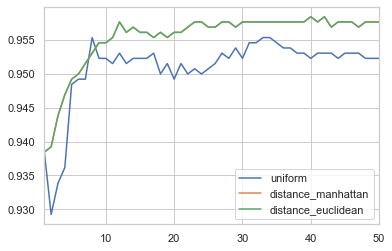

In [106]:
acc[:].plot.line()

<h1>ANALYSIS::-Normalized PCA,LDA, Unnormalized PCA, Unnormalized LDA--> KNN || Weighting schemes-->3 ||Label : color </h1>

<h6>U.E--> Uniform Euclidean, D.M--> Distance Manhattan, D.E--> Distance Euclidean<h6>

<h2>COMPARISON BETWEEN PCA,LDA (Both Normalized):</h2>

<h5>1.EXECUTION TIME:</h5>
<p>On classifying test data using KNN (on pca components)using 3 different weighting schemes, it takes approximately 29 seconds. LDA takes the least time which is around 4.84 sec. </p>
<p>Result---> LDA is best when compared on execution time.</p>

    
<h5>2.MISCLASSIFICATION ERROR:</h5>
    
<p>Misclassifications made by the best weighting scheme(D.E in case of PCA) are 5 which can be seen in the confusion matrix.</p>
<p>Misclassifications made by the best weighting scheme(U.E in case of LDA) are 8 which can be seen in the confusion matrix.</p>
    
<p>Result- PCA is better when compared on misclassifying data points in our case. LDA also provides somehow similar results.</p>
    
    
    
<h5>3.MEAN ACCURACY: </h5>
    
<p>Mean accuracy given by the best weighting scheme(D.E in case of PCA) is 99.20%.</p>
    
<p>For all k's , the mean accuracy given by the best weighting scheme(U.E in case of LDA) is 99.39%.</p>

<p>Result---> LDA is best when compared on mean accuracies for best scheme at multiple k's. Although mean accuracy doesn't add up to a decent comparison parameter here.</p>

    
<h5>4.HIGHEST ACCURACY:</h5>
    
<p>For k=3 , the highest accuracy given by the best weighting scheme(D.E in case of PCA) is 99.61%.</p>
    
<p>For k=[6:18] , the highest accuracy given by the best weighting scheme(U.E in case of LDA) is 99.46%.</p>

<p>Result---> PCA is best when compared on highest accuracy for best scheme with other models. LDA also provides somehow similar results as we can see highest accuracy of 99.46% is present at k=6 to k=18.</p>

<h3>OVERALL RESULTS:</h3>
<h5>1.LDA is best on execution time and constant highest accuracy at multiple k's.</h5>
<h5>1.PCA is best when we take highest accuracy into account which is the most important parameter in classification. But it takes longer time to derive the d*d principal components.</h5>


<h2>IMPACT OF NORMALIZATON:/h2>
<p></p>
    
<h5>1.EXECUTION TIME:</h5>
    
<p></p>
<p>PCA(NORM AND UNNORM)=>Time taken by PCA KNN UNNORMALIZED	is around 5.7 seconds whereas PCA KNN NORMALIZED takes around 29 seconds. </p>
<p>LDA(NORM AND UNNORM)=>Time taken by LDA KNN UNNORMALIZED and LDA KNN NORMALIZED is similar around 5 seconds each. </p>

<h5>2.HIGHEST ACCURACY:</h5>
    
<p></p>
<p>PCA(NORM AND UNNORM)=>Highest accuracy given by the PCA(Norm) is 99.61% and the PCA(Unnorm) is 97.6%.[accuracy taken from the best scheme individually.]</p>
    
<p>LDA(NORM AND UNNORM)=>Highest accuracy given by the LDA(Norm) is 99.46% and the LDA(Unnorm) is 95.8%.[accuracy taken from the best scheme individually.]</p>

<h3>RESULT:-></h3>
    
<p>1. When PCA is applied on unnormalized data, execution times reduces to 1/6(time (PCA on normalized data)) and highest accuracy reduces by approximately 1%.</p>

<p>2.When LDA is applied on unnormalized data, execution times remains same but highest accuracy takes a hit of around 4%.</p>

In [107]:
Timetaken

Model       time
0       Unnormalized KNN  11.168143
1         Normalized KNN  41.344797
2     PCA KNN NORMALIZED  30.634010
3     LDA KNN NORMALIZED   5.114016
4  PCA(5) KNN NORMALIZED  12.246782
5  PCA KNN UNNORMALIZED    5.730788
6   LDA KNN UNNORMALIZED   4.880362

<h1>PAIR PLOT BETWEEN FIRST 2 COMPONENTS OF PCA || QUALITY AS LABEL || WHOLE NORMALIZED </h1>


In [176]:
X1=wine[D]
y1=wine[L] 
wine_normalized_for_pairplot_pca_lda_2=((wine-wine.mean())/wine.std())
wine_normalized_for_pairplot_pca_lda_2['color']=wine['color'] 
wine_normalized_for_pairplot_pca_lda_2['quality']=wine['quality']

In [177]:
wine_normalized_for_pairplot_pca_lda_2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.166076         -0.423150     0.284664        3.206682  -0.314951   
1         -0.706019         -0.240931     0.147035       -0.807775  -0.200775   
2          0.682405         -0.362411     0.559923        0.306184  -0.172231   
3         -0.011807         -0.666110     0.009405        0.642474   0.056121   
4         -0.011807         -0.666110     0.009405        0.642474   0.056121   
...             ...               ...          ...             ...        ...   
1594      -0.783154          1.581266    -1.642146       -0.723703   0.969530   
1595      -1.014558          1.277566    -1.504517       -0.681666   0.170298   
1596      -0.706019          1.034607    -1.298073       -0.660648   0.569914   
1597      -1.014558          1.854595    -1.366888       -0.723703   0.541370   
1598      -0.937423         -0.180191     1.041625       -0.387413   0.313018   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.815503              0.959902  2.102052 -1.358944   
1               -0.931035              0.287595 -0.232314  0.506876   
2               -0.029596             -0.331634  0.134515  0.258100   
3                0.928182              1.242978  0.301255 -0.177258   
4                0.928182              1.242978  0.301255 -0.177258   
...                   ...                   ...       ...       ...   
1594             0.083083             -1.269324  0.067819  1.439786   
1595             0.477463             -1.145479  0.141185  1.875144   
1596            -0.085936             -1.340094  0.347943  1.253204   
1597             0.083083             -1.269324  0.257903  2.186114   
1598            -0.705676             -1.304709  0.264572  1.066622   

      sulphates   alcohol  quality  color  
0     -0.546136 -1.418449        6    0.0  
1     -0.277330 -0.831551        6    0.0  
2     -0.613338 -0.328496        6    0.0  
3     -0.882144 -0.496181        6    0.0  
4     -0.882144 -0.496181        6    0.0  
...         ...       ...      ...    ...  
1594   0.327485  0.006874        5    1.0  
1595   1.537115  0.593772        6    1.0  
1596   1.469913  0.426087        6    1.0  
1597   1.201107 -0.244653        5    1.0  
1598   0.865098  0.426087        6    1.0  

[6497 rows x 13 columns]

In [238]:
from sklearn.decomposition import PCA
pca_normalized_2_components=PCA(2,random_state=42)
pca_2_components_q=pca_normalized_2_components.fit_transform(wine_normalized_for_pairplot_pca_lda_2[D])

In [239]:
type(pca_2_components_q)

numpy.ndarray

In [240]:
q=pd.DataFrame(wine_normalized_for_pairplot_pca_lda_2[L],columns=['quality'])

In [241]:
q=q.to_numpy()

In [242]:
# pca_2_coamponents_q1=pd.concat([pca_2_components_q,q],axis=1)
pca_2_components_q=np.append(pca_2_components_q,q,axis=1)

In [243]:
pca_2_components_q=pd.DataFrame(pca_2_components_q)

In [244]:
pca_2_components_q

0         1    2
0     2.778405  3.042096  6.0
1    -0.129783 -0.491645  6.0
2     0.194723  0.378725  6.0
3     1.807167  0.589547  6.0
4     1.807167  0.589547  6.0
...        ...       ...  ...
6492 -2.194778 -0.541667  5.0
6493 -2.042959 -0.894940  6.0
6494 -2.274635 -0.423679  6.0
6495 -2.479375 -0.392749  5.0
6496 -1.258604 -0.383344  6.0

[6497 rows x 3 columns]

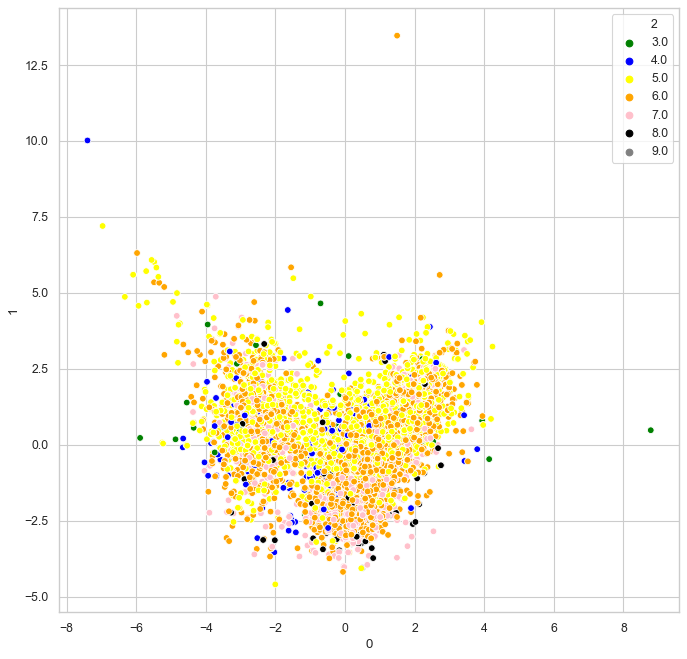

In [245]:
fig2=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.scatterplot(pca_2_components_q[0],pca_2_components_q[1],hue=pca_2_components_q[2],legend='full',palette=['green','blue','yellow','orange','pink','black','gray'])
sns.set_style('whitegrid')

In [246]:
cor_pca_q=pca_2_components_q.corr()
abs(cor_pca_q)

0             1         2
0  1.000000e+00  9.875955e-17  0.076147
1  9.875955e-17  1.000000e+00  0.314960
2  7.614681e-02  3.149598e-01  1.000000

<h1>PAIR PLOT BETWEEN FIRST 2 COMPONENTS OF LDA || QUALITY AS LABEL || WHOLE NORMALIZED</h1>

In [222]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda_normalized_2_components=lda.fit_transform(wine_normalized_for_pairplot_pca_lda_2[D],wine_normalized_for_pairplot_pca_lda_2['quality'])

In [223]:
q=pd.DataFrame(wine_normalized_for_pairplot_pca_lda_2[L],columns=['quality'])

In [224]:
q.to_numpy()

array([[6],
       [6],
       [6],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

In [225]:
lda_normalized_2_components=np.append(lda_normalized_2_components,q,axis=1)

In [226]:
lda_normalized_2_components=pd.DataFrame(lda_normalized_2_components)

In [227]:
lda_normalized_2_components

0         1    2
0     0.781139 -1.508535  6.0
1     1.372613 -0.173217  6.0
2    -0.195948  0.577710  6.0
3     0.339889 -0.424582  6.0
4     0.339889 -0.424582  6.0
...        ...       ...  ...
6492  0.585186  0.322741  5.0
6493 -0.484526 -0.475843  6.0
6494 -0.222382 -0.983738  6.0
6495  0.672622  0.581747  5.0
6496 -0.508202 -1.708925  6.0

[6497 rows x 3 columns]

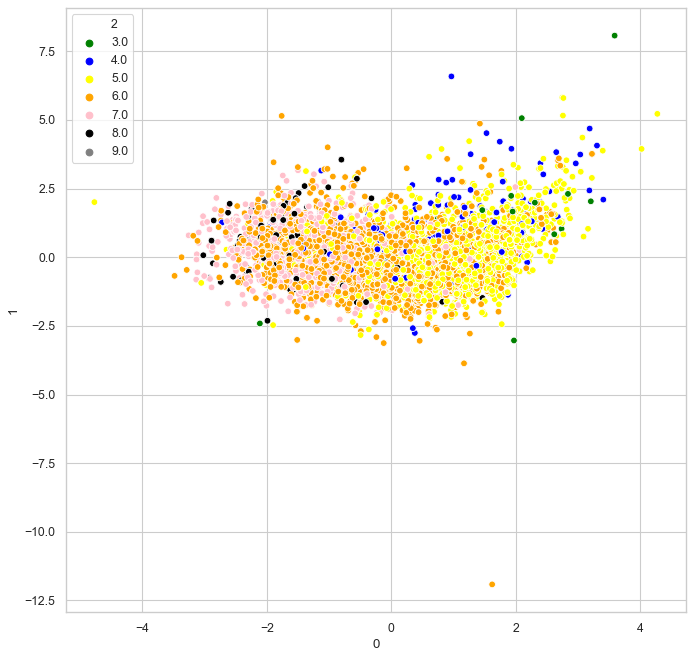

In [228]:
fig2=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.scatterplot(lda_normalized_2_components[0],lda_normalized_2_components[1],hue=lda_normalized_2_components[2],legend='full',palette=['green','blue','yellow','orange','pink','black','gray'])
sns.set_style('whitegrid')

In [231]:
cor_lda=lda_normalized_2_components.corr()
abs(cor_lda)

0             1         2
0  1.000000e+00  2.005912e-16  0.539941
1  2.005912e-16  1.000000e+00  0.021028
2  5.399409e-01  2.102808e-02  1.000000

<h1>PAIR PLOT BETWEEN FIRST 2 COMPONENTS OF PCA || COLOR AS LABEL || WHOLE NORMALIZED</h1>

In [200]:
from sklearn.decomposition import PCA
pca_normalized_2_components=PCA(2,random_state=42)
pca_2_components_c=pca_normalized_2_components.fit_transform(wine_normalized_for_pairplot_pca_lda_2[D]) 

In [201]:
q=pd.DataFrame(wine_normalized_for_pairplot_pca_lda_2[C],columns=['color'])

In [202]:
q=q.to_numpy()

In [203]:
pca_2_components_c=np.append(pca_2_components_c,q,axis=1)

In [233]:
pca_2_components_c=pd.DataFrame(pca_2_components_c)

In [234]:
pca_2_components_c

0         1    2
0     2.778405  3.042096  0.0
1    -0.129783 -0.491645  0.0
2     0.194723  0.378725  0.0
3     1.807167  0.589547  0.0
4     1.807167  0.589547  0.0
...        ...       ...  ...
6492 -2.194778 -0.541667  1.0
6493 -2.042959 -0.894940  1.0
6494 -2.274635 -0.423679  1.0
6495 -2.479375 -0.392749  1.0
6496 -1.258604 -0.383344  1.0

[6497 rows x 3 columns]

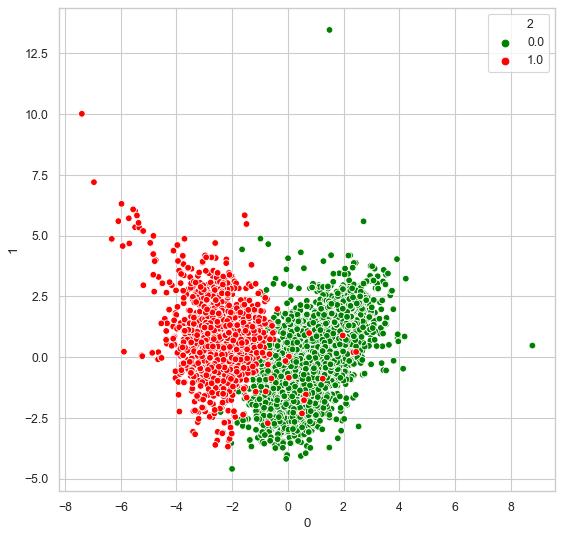

In [236]:
fig2=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
sns.scatterplot(pca_2_components_c[0],pca_2_components_c[1],hue=pca_2_components_c[2],legend='full',palette=['green','red'])
sns.set_style('whitegrid')

<h6>correlation between Principal components and class label 'color'</h6>

In [247]:
cor_pca=pca_2_components_c.corr()
abs(cor_pca)

0             1         2
0  1.000000e+00  9.875955e-17  0.825421
1  9.875955e-17  1.000000e+00  0.280666
2  8.254209e-01  2.806656e-01  1.000000

<h6>For comparison : Best selected features -->'total sulfur dioxide','chlorides'</h6>

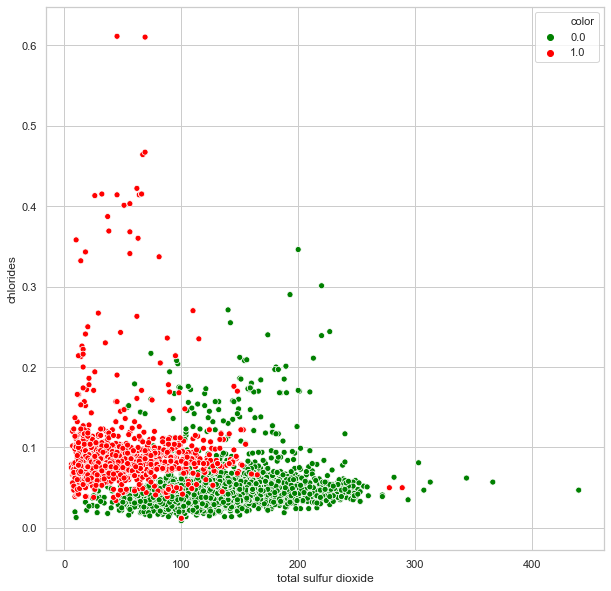

In [208]:
selectedfea2=wine[['total sulfur dioxide','chlorides']]
plt.figure(figsize=(10,10))

sns.scatterplot(wine['total sulfur dioxide'],wine['chlorides'],hue=wine['color'],palette=['green','red'])

<h6>correlation between best features and class label 'color'</h6>

In [221]:
corn_best_fea=corn.loc[['total sulfur dioxide','color'],['chlorides','color']]
corn_best_fea

chlorides     color
total sulfur dioxide   0.279630  0.700357
color                  0.512678  1.000000

<h1>ANALYSIS::-></h1>

<h3>PC1 & PC2 v/s Total sulfur dioxide & chlorides(Best features from original dataset) || COLOR AS LABEL</h3>
<p>1.Separation of the classes is better in case of PC1 vs PC2 plot with class label 1 overlapping class label 0 at few points. Whereas, In case of the best features that we selected earlier, there is a lot of overlapping. </p>
<p>2.It can be clearly seen the correlation between the PC1 and the PC2 is least i.e 9.8e-17 and the correlation with class label is very high. Thus, this makes PC1 and PC2 drastically better than the two best features that we selected earlier.</p>
<p>Thus, the visual separability is proved to be good for PC1 vs PC2 by correaltion of features with each other and with the class label 'color'.</p>

<h3>PC1 & PC2 v/s LDA1 & LDA2 || QUALITY AS LABEL</h3>

<p>1.LDA1 vs LDA2 plot separates all the class labels better than PCA1 vs PCA2 which is obvious as LDA uses class labels to maximize the distance between the means of the two classes.</p>
<p>2.It can be seen from the correlation matrix, that the highest correlation between PC and class 'quality' is 0.314960 which is less than the highest correlation between LDA component and class 'quality' which is 0.539941.</p>
<p>This proves that LDA is providing better separability than PCA when class is taken as quality.</p>

<h1>EXTRA: contradictions from piazza</h1> 

<h3>NORMALIZING WHOLE DATASET AND THEN PERFORMING THE SPLIT---> leaking the test info as mean and std dev to training data. color as label</h3>

In [163]:
#norm whole dataset 
wine_normalized_full=((wine-wine.mean())/wine.std())#normalizing whole dataset. This can also be done using StandardScaler().
wine_normalized_full['color']=wine['color'] # replacing color and quality 
wine_normalized_full['quality']=wine['quality']

In [164]:
#splitting after nornm
X_norm=wine_normalized_full[D]
y_norm=wine_normalized_full[C]
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2, random_state = 42)

<h2>PCA--NORMALIZED DATA--> Normalize and split-->color as label </h2>

In [165]:
from sklearn.decomposition import PCA
pca_normalized_full=PCA(random_state=42)
pca_train_data5=pca_normalized_full.fit_transform(X_train_norm) #in order to keep the variations different ?
pca_test_data5=pca_normalized_full.transform(X_test_norm)

In [170]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh30 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh30.fit(pca_train_data5, y_train_norm)
    y_pred = neigh30.predict(pca_test_data5)
    accscore = accuracy_score(y_test_norm, y_pred)
    acc.at[k,col_names[0]] = accscore
    
    neigh31 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh31.fit(pca_train_data5, y_train_norm)
    y_pred1 = neigh31.predict(pca_test_data5)
    accscore1 = accuracy_score(y_test_norm, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh32 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh32.fit(pca_train_data5, y_train_norm)
    y_pred2 = neigh32.predict(pca_test_data5)
    accscore2 = accuracy_score(y_test_norm, y_pred2)
    acc.at[k,col_names[2]] = accscore2


In [171]:
acc.max()

uniform               0.994615
distance_manhattan    0.994615
distance_euclidean    0.995385
dtype: float64

<h2>LDA--NORMALIZED DATA--> Normalize and split-->color as label </h2>

In [172]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_normalized_full = LDA()
lda_transformed_train_full=lda_normalized_full.fit_transform(X_train_norm, y_train_norm) #feature reduced to 1 
lda_transformed_test_full=lda_normalized_full.transform(X_test_norm) # same but separately  # also tested for same .
# lda_with_label=pd.concat([lda_tranformed1,wine_normalized[C]],axis=1)
#it separated the data class wise.

In [173]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh10 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh10.fit(lda_transformed_train, y_train)
    y_pred = neigh10.predict(lda_transformed_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore

    neigh11 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh11.fit(lda_transformed_train, y_train)
    y_pred1 = neigh11.predict(lda_transformed_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh12 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh12.fit(lda_transformed_train, y_train)
    y_pred2 = neigh12.predict(lda_transformed_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2


In [174]:
acc.max()

uniform               0.994615
distance_manhattan    0.993077
distance_euclidean    0.993077
dtype: float64

<h6>LDA:Same accuracy as split and normalize for all the three schemes.</h6>
<h6>PCA:Slightly less accuracy than split and normalize.</h6>